<a href="https://colab.research.google.com/github/SatNichapon/DSI205_project/blob/main/DSI205project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> DSI205: Least-Squares Problem Project </h1>

การทำนายยอดขายรายสัปดาห์เมื่อเปรี่ยบเทียบกันในปี 2010-2012 ของ Walmart แห่งหนึ่งในสหรัฐอเมริกา ด้วยเทคนิค Regression โดยใช้ไลบรารี่ scikit-learn บนชุดข้อมูล Diabetes dataset


<h3> รายชื่อสมาชิกกลุ่ม </h3>
  

* 6524651038 ปุณณวิช ศิลปเสริฐ
* 6524651061 จีรัฏฐ์ โนดไธสง
* 6524651210 ชัญญานุช เจริญพนารัตน์
* 6524651244 ณิชพน รัถยาบัณฑิต
  

##Data Description 


Dataset Link: https://www.kaggle.com/datasets/yasserh/walmart-dataset 
<br>
<br>

---
\
<h4>คำอธิบาย </h4>

Walmart เป็นหนึ่งในร้านค้าปลีกชั้นนำในสหรัฐอเมริกา
ที่ต้องการทำนายยอดขายรวมถึงอุปสงค์อย่างแม่นยำ มีทั้งวันเทศกาล และวันหยุดพักผ่อนบางวันที่มีผลต่อยอดขายในแต่ละวัน ในชุดข้อมูลนี้มีข้อมูลการขายสำหรับร้าน Walmart อยู่ทั้งหมด 45 สาขา

ธุรกิจนี้ต้องเผชิญกับความท้าทายจากความต้องการที่ไม่คาดคิดและมักจะเกิดขึ้นเมื่อสินค้าหมดจำนวนลงโดยเนื่องจากอัลกอริทึม Machine Learning

Walmart ได้จัดกิจกรรมลดราคาโปรโมชันหลายรอบตลอดปี โดยกิจกรรมลดราคาเหล่านี้จะมาก่อนวันหยุดพิเศษ คือ Super Bowl , Labour Day , Thanksgiving และ Christmas
<br>
<br>

---
\
<h4>วัตถุประสงค์</h4>

เข้าใจชุดข้อมูล และทำความสะอาดข้อมูล สร้างโมเดล Regression เพื่อทำนายยอดขายโดยมีตัวแปรอิสระหลายตัวและประเมินผลโมเดลและเปรียบเทียบคะแนนที่เกี่ยวข้อง เช่น R2, RMSE เป็นต้น
<br>
<br>

---
\
<h4>Attribute ทั้งหมดของ Dataset นี้</h4>

ข้อมูลนี้ครอบคลุมยอดขายตั้งแต่วันที่ 5 กุมภาพันธ์ 2010 ถึงวันที่ 1 พฤศจิกายน 2012 ใน dataset จะมี attribute ต่อไปนี้:
* Store - the store number
* Date - the week of sales
* Weekly_Sales - sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13





## Prepare Dataset

<h3> Import Libraries </h3> 

In [89]:
import numpy as np
import pandas as pd
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ปิดการใช้งานแจ้งเตือนทั้งหมด (Suppress All Warning in Python)
import warnings
warnings.filterwarnings("ignore")

<h3> Load Dataset </h3>

Install kaggle

สร้าง directory ที่เรียกว่า kaggle พร้อมทั้งเขียน API (kaggle.json) ใน directory ใช้ !chmod 600 เพื่อขอ permissions เพื่ออ่านและเขียน kaggle.json install package เพื่อดึง data จาก kaggle ผ่าน cmd

In [90]:
!mkdir ~/.kaggle
!echo '{"username":"satnic","key":"2dc47bf14b840441564d87209e1d9136"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ดาวน์โหลดชุดข้อมูล Walmart จาก Kaggle

In [91]:
!kaggle datasets download yasserh/walmart-dataset

walmart-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Unpack zip file

In [92]:
!unzip walmart-dataset.zip

Archive:  walmart-dataset.zip
replace Walmart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Walmart.csv             


ใช้คำสั่ง read_csv จากไลบารี่ pandas ในการอ่านไฟล์ 'Walmart.csv' และทำให้อยู่ในรูป dataframe

In [93]:
data = pd.read_csv('Walmart.csv')
df = pd.DataFrame(data)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


ใช้คำสั่ง shape เพื่อดูจำนวน record และ attribute

In [94]:
df.shape

(6435, 8)

**<h3> Data Cleaning </h3>**

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


df.info() ใช้แสดงข้อมูลเกี่ยวกับ DataFrame โดยจะแสดง columns จำนวน row และบอกว่ามีค่าว่างหรือไม่ และบอก data type ของแต่ละ column  
df.info() จะช่วยให้เรารู้ว่าข้อมูลที่โหลดมามีความสมบูรณ์และถูกต้องหรือไม่

In [96]:
df['Date'] = pd.to_datetime(df['Date'])

แปลงข้อมูลในคอลัมน์ Date ให้กลายเป็นข้อมูลประเภท datetime เพื่อให้สามารถนำไปวิเคราะห์ได้รวมถึงใช้ในการสร้างกราฟเป็น time series ได้ง่ายขึ้นด้วย 

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


เช็คดูว่า data type ของ Date เปลี่ยนไปหรือยัง

In [98]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


แสดงค่าสถิติเชิงพรรณา(descriptive statistics) ของข้อมูลใน DataFrame ซึ่งจะช่วยให้เราสามารถดูค่าสถิติบางค่าและเข้าใจข้อมูลเบื้องต้นได้ง่ายขึ้น 

Check duplicate

เพื่อตรวจสอบว่าข้อมูลมีค่าซ้ำกันหรือไม่ หากมีค่าซ้ำกันอาจจะมีผลต่อการวิเคราะห์และการประมวลผลข้อมูลได้

In [99]:
df[df.duplicated()] 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


Check missing values

ทำเพื่อตรวจสอบว่าในตารางมีข้อมูลหายไปในบาง record หรือไม่

In [100]:
df.isnull().mean()

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

**<h3> Fixing Outliers </h3>**
 
สร้างฟังก์ชันตรวจสอบ outlier โดยฟังก์ชันชื่อ find_outlier_rows ฟังก์ชันรับ dataframe และชื่อ column เพื่อระบุค่า outlier ใน column นั้น โดยใช้เกณฑ์ค่าที่อยู่นอกช่วง 1.5 ของ IQR และให้คืนค่า dataframe ที่เก็บค่า outlier ของ column นั้นไว้


In [101]:
def find_outlier_rows(df, col):
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

  lower_bound = df[col].quantile(0.25) - 1.5*iqr
  upper_bound = df[col].quantile(0.75) + 1.5*iqr
  
  return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

สร้างฟังก์ชันชื่อ count_outliers ที่รับค่า dataframe โดยฟังก์ชันจะเลือกคอลัมน์ที่เก็บข้อมูลเป็นตัวเลข และเรียกใช้ฟังก์ชัน find_outlier_rows กับคอลัมน์ที่เก็บข้อมูลเป็นตัวเลขและคอลัมน์ที่มี outlier 


outlier จะถูกนับและจะถูกคำนวณเป็นเปอร์เซ็นต์ของจำนวนข้อมูลทั้งหมดในคอลัมน์และสร้าง dataframe ชื่อ outliers_df เพื่อเก็บทั้งจำนวนของ  outlier และเปอร์เซ็นต์ของ outlier ต่อจำนวนข้อมูลทั้งหมดคอลัมน์นั้นๆ แล้วสุดท้ายฟังก์ชันจะคืนค่า outliers_df ออกมา

In [102]:
def count_outliers(df):
  df_numeric = df.select_dtypes(['int', 'float'])
  cols_numeric = df_numeric.columns

  outlier_cols = [col for col in cols_numeric if len(find_outlier_rows(df_numeric, col)) != 0]

  outliers_df = pd.DataFrame(columns=['outlier_count', 'outlier_percent'])

  for col in outlier_cols:
    outlier_count = len(find_outlier_rows(df_numeric, col))
    all_entries = len(df[col])
    outlier_percent = (outlier_count/all_entries)*100

    outliers_df.loc[col] = [outlier_count, outlier_percent]

  return outliers_df

เรียกใช้ฟังก์ชัน count_outliers() โดยให้พารามิเตอร์คือ dataframe ซึ่งก็คือ df และทำการเรียงลำดับจากมากไปน้อยโดยยึดคอลัมน์ outlier_count

In [103]:
count_outliers(df).sort_values('outlier_count', ascending=False)

,outlier_count,outlier_percent
Unemployment,481.0,7.474747
Holiday_Flag,450.0,6.993007
Weekly_Sales,34.0,0.528361
Temperature,3.0,0.046620


ตารางข้างต้นแสดงว่าคอลัมน์ Unemployment, Holiday_Flag, Weekly_Sales และ Temperature มี outliers อยู่ในข้อมูล


ตรวจสอบลึกลงไปในแต่ละคอลัมน์ โดยเรียกใช้ฟังชั่น find_outlier_rows กับคอลัมน์ Unemployment , Holiday_Flag และ Weekly_Sales และให้แสดงเป็นผลทางสถิติ ยกเว้นคอลัมน์ Weekly_Sales เพราะ record ที่เป็น outlier มีจำนวนน้อย เลยสำรวจ outlier เองทั้ง dataframe ส่วนคอลัมน์ Temperature นั้น อุณหภูมิที่สูงหรือต่ำกว่าปกติตลอด 3 ปี (2010-2012) จึงถือว่าเป็น outlier ที่ยอมรับได้

In [104]:
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [105]:
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Holiday_Flag, dtype: float64

In [106]:
find_outlier_rows(df, 'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003


**<h3> Do a feature engineering </h3>**


สร้างคอลัมน์ Employment จากการนำคอลัมน์ Unemployment ทั้งคอลัมน์มาลบกับ 100 เพื่อให้ได้ค่า Employment และทำการสุ่มตัวอย่างขึ้นมาเช็ค

In [107]:
df['Employment'] = 100 - df['Unemployment']
df.sample(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment
2436,18,2010-12-03,1138800.32,0,42.39,2.805,131.784000,9.202,90.798
3361,24,2011-06-24,1304850.67,0,68.88,3.964,135.265267,8.212,91.788
233,2,2011-10-28,1769296.25,0,65.87,3.372,217.325182,7.441,92.559


สร้างคอลัมน์ใหม่ชื่อ 'Year' ที่เก็บเฉพาะปี จากคอลัมน์ Date

สร้างคอลัมน์ใหม่ชื่อ 'Month' ที่เก็บเฉพาะเดือน จากคอลัมน์ Date

สร้างคอลัมน์ใหม่ชื่อ 'Day' ที่เก็บเฉพาะวันที่ จากคอลัมน์ Date

In [108]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


**<h3> หาความสัมพันธ์(correlation) ระหว่างคอลัมน์ต่างๆ กับคอลัมน์ Weekly_Sales </h3>**

Text(0.5, 1.0, 'Correlation Heatmap')

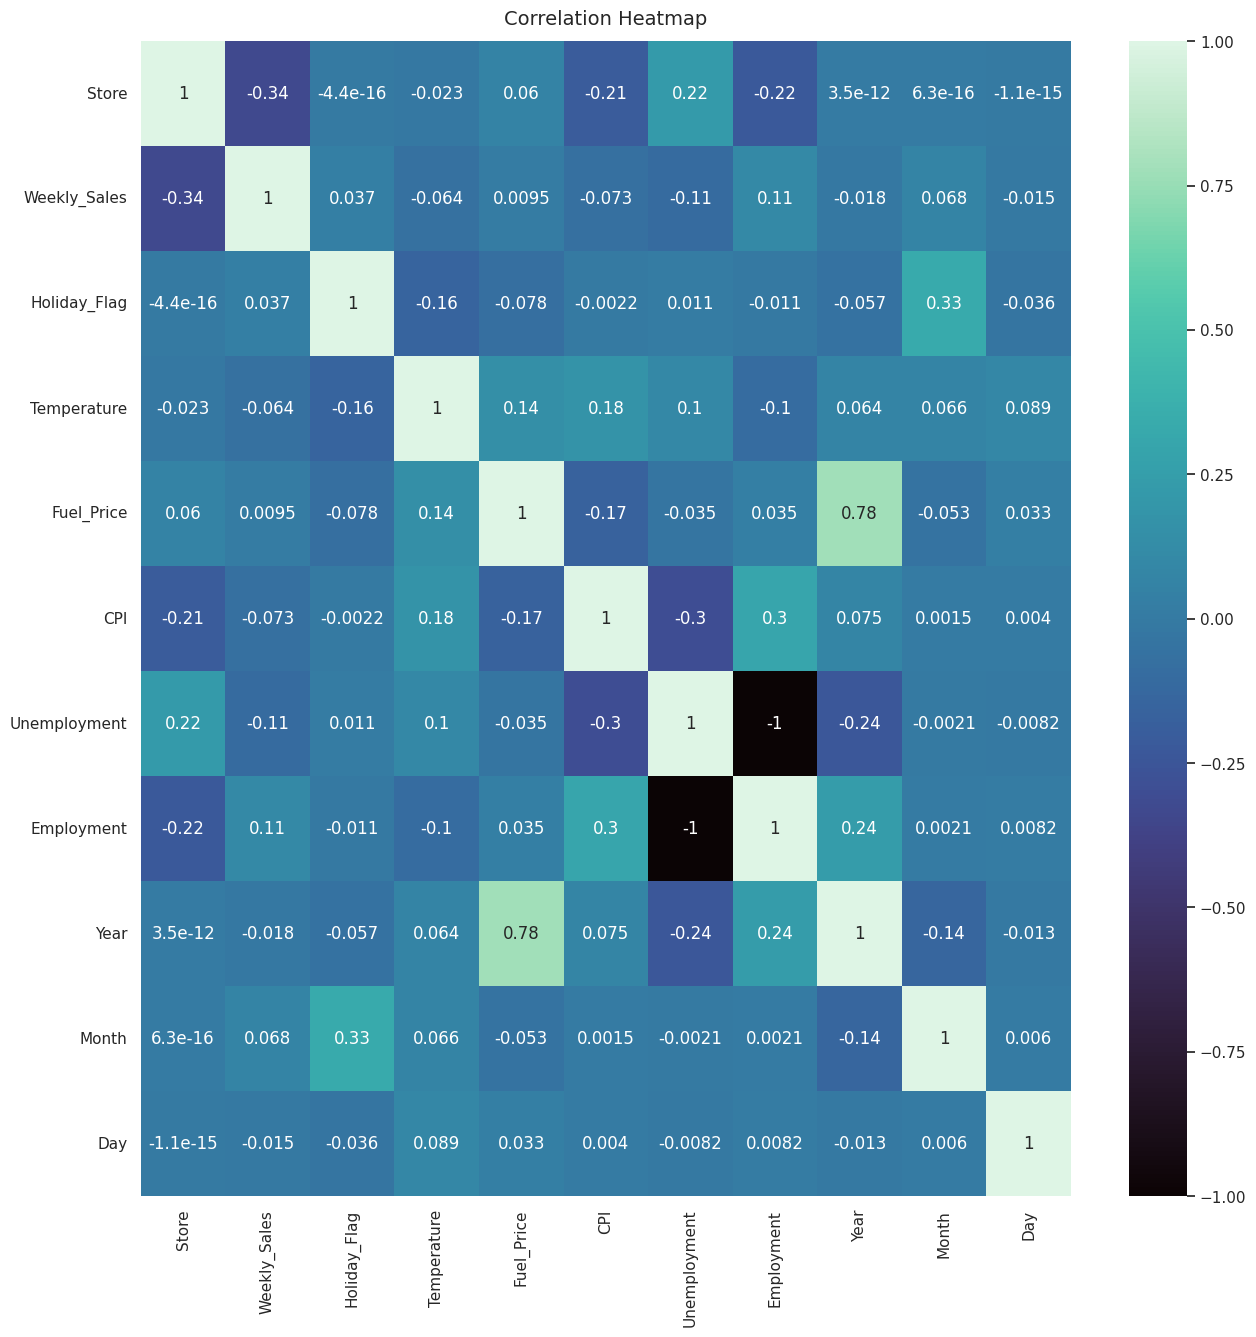

In [109]:
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1 ,annot=True, cmap="mako")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

ความสัมพันธ์ที่มากที่สุดคือ Weekly_Sales กับตัวแปร Employment มีค่า correlation coefficient เท่ากับ 0.11

## Model building

สร้าง dataframe ชื่อ df_copy ซึ่งคัดลอกมาจาก df ผ่านฟังก์ชัน copy

In [110]:
df_copy = df.copy()
df_copy.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Employment,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


ลบคอลัมน์ 'Date' และ 'Unemployment' ออกจาก df_copy เนื่องจากมีคอลัมน์ 'Year', 'Month' และ 'Day'

In [111]:
df_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
df_copy.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Employment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19


Seperate X and y

กำหนดค่าตัวแปร X เป็น df_copy ที่ทำการลบคอลัมน์ Weekly_Sales ออก เพื่อนำไปเป็นตัวแปรอิสระในการสร้างโมเดล <br>
กำหนดค่าตัวแปร y เป็น series ของ Weekly_Sales เพื่อนำไปเป็นตัวแปรตามในการสร้างโมเดล

In [112]:
# ให้ X แทน df ที่นำ Weekly_Sales ออก และ Y แทน serie ของ column Weekly_Sales
X = df_copy.drop('Weekly_Sales', axis=1)
y = df_copy['Weekly_Sales']

Split Train and Test data

แบ่งข้อมูลออกเป็นชุดข้อมูลสอน (Training dataset) และชุดข้อมูลทดสอบ (Test dataset) โดยแบ่งที่อัตราส่วน 80:20

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
print(f'Train data: {X_train.shape}')
print(f'Train target: {y_train.shape}')
print(f'Test data: {X_test.shape}')
print(f'Test target: {y_test.shape}')

Train data: (5148, 9)
Train target: (5148,)
Test data: (1287, 9)
Test target: (1287,)


**<h3> Train and Evaluate Model </h3>**

โดยลองใช้โมเดล 
1. Multiple Linear Regression

  y = β₀ + β₁x₁ + β₂x₂ + … + βᵣxᵣ

การใช้ linear regression กับข้อมูลที่มีมากกว่า 1 feature เพื่อทำนายผลของตัวแปรอิสระ โดยสร้างสมการ linear regression ที่มีหลายตัวแปรอิสระ โดยใช้ค่า intercept และค่า coefficients)
จุดประสงค์หลักของ Multiple Linear Regression คือ เพื่อหาค่า coefficient ที่เหมาะสมที่สุดในการปรับสมการเพื่อให้สามารถคำนวณค่า y ที่ถูกต้องได้ โดยใช้ข้อมูลที่มีมากกว่า 1 ตัวแปร independent เป็น input
2. Ridge Regression

  argmin 𝐰 {||𝐲 − 𝐗𝐰||₂² + α||𝐰||₂²}
  
Ridge regression เป็นวิธีการปรับปรุงโมเดล Linear Regression โดยเพิ่ม Regularization term ใน objective function ของ Linear Regression ด้วย L2-norm ของ coefficients เพื่อลดความเสี่ยงที่จะเกิด overfitting ของโมเดล การเพิ่ม Regularization term จะทำให้โมเดลมีความซับซ้อนน้อยลง และลดความเผื่อไว้ในข้อมูล training ซึ่งช่วยลดปัญหา variance ของโมเดล โดยที่ L2-norm จะเป็นการเอาค่าของ coefficients ยกกำลังสองแล้วหารด้วยสอง ซึ่งจะใช้ได้กับ Linear Regression เมื่อต้องการลดค่า coefficients ที่มีค่ามากเกินไป และทำให้โมเดลสามารถ generalization ได้ดีกว่า Linear Regression ปกติ

3. Lasso Regression

  argmin 𝐰 {||𝐲 − 𝐗𝐰||₂² + α||𝐰||₁}

เป็นอัลกอริทึมหนึ่งที่ใช้ในการทำ Regularization โดยจะเพิ่มการลดค่าความสำคัญของค่าความสัมพันธ์ที่ต่ำกว่าค่า threshold ที่กำหนดไว้ ซึ่งจะช่วยในการลด overfitting และเพิ่มความประพันธ์ของโมเดล นอกจากนี้ Lasso Regression ยังสามารถทำ Feature selection ได้โดยใช้ค่าความสัมพันธ์เพื่อเลือก Feature ที่สำคัญที่สุดในการสร้างโมเดล โดยมีการใช้ L1 Regularization ในการลดค่าความสำคัญของ feature ที่ไม่ส่งผลต่อโมเดล ทำให้ Lasso Regression มีประสิทธิภาพสูงในกรณีที่ต้องการเลือก Feature ที่สำคัญสุดในการสร้างโมเดลในข้อมูลที่มีจำนวน feature มาก

4. Decision Tree Regression

อัลกอริทึมหนึ่งในการสร้างโมเดลเพื่อทำนายค่าต่างๆ โดยโมเดลจะถูกสร้างขึ้นจากการแบ่งชุดข้อมูลออกเป็นหลายๆ กลุ่มโดยใช้เงื่อนไขทางตรรกะเพื่อให้เกิดการแบ่งข้อมูลที่มีความแตกต่างกันมากที่สุดระหว่างกลุ่ม โดยที่ค่าตัวแปรเป้าหมาย (target variable) ในแต่ละกลุ่มนั้นมีค่าเฉลี่ยต่างกันไปจากกลุ่มอื่นๆ โดยโมเดลจะสร้างขึ้นจากการแบ่งชุดข้อมูลออกเป็นหลายๆ โหนด ซึ่งแต่ละโหนดจะเป็นกลุ่มของข้อมูลที่มีคุณสมบัติ (feature) เหมือนกัน โดยที่การแบ่งแต่ละโหนดจะทำโดยเลือก feature ที่ช่วยในการแยกกลุ่มข้อมูลได้ดีที่สุด ซึ่งการแบ่งแต่ละโหนดจะทำซ้ำไปเรื่อยๆ จนกว่าจะไม่สามารถแบ่งข้อมูลออกได้อีก โดยค่าที่ถูกใช้สำหรับการแบ่งข้อมูลจะเป็นค่าของตัวแปรเหมือนกับ Linear Regression และใน Decision Tree Regression นี้จะไม่มีการใช้ regularization ต่างๆ เช่น L1 หรือ L2 regularization แต่อาจมีการตัดสินใจด้วยการตัดค่าความลึกของต้นไม้ (max_depth) เพื่อลด overfitting ในโมเดล

decision เป็นอัลกอ tree-like structure 
เริ่มจากหา rootnode ผ่านการคำนวณ impurity คือ metric ที่วัดความแตกต่างของชนิดข้อมูล
หลังจากนั้นอัลกอริทึมจะเลือก best feature เพื่อแยก node (child node) โดยค่า MSE (Mean Squared Error) ใช้เกณฑ์ในการแบ่ง node โดย splitting criterion จะเป็นการหา feature ที่มีค่า MSE ต่ำที่สุดในการแบ่ง node ที่มากที่สุด เมื่อได้ child node แรกมาหลังจากนั้นอัลกอริทึจะทำซ้ำเพื่อ แยก child node ต่อมาจะการทำซ้ำ จนกว่าจะแบ่งข้อมูลไม่ได้อีก (maximum depth) หลังจากนั้น จะกำหนดค่า prediction ในแต่ละ leaf node


5. Random Forest Regressionramdom 

คือ ensemble learning algorithm ( begging) ที่รวม decision tree เพื่อลด overfitting และเพิ่มประสิทธิภาพโดย แต่ละ decision tree  มีข้อมูลในการเทรนที่แตกต่างกัน  โดยข้อมูลเหล่านั้นเกิดมาจากการทำ sampling with replacement (boostraping) ซึ่งแต่ละ node  ในแต่ละ decision tree จะสุ่ม feature เพื่อลด correlation ระหว่าง decision tree หลังจากนั้นจะนำข้อมูลกับ feature เหล่านั้น ไปเทรนอัลกอรึทึมเดียวกับ decision tree หลังจากนั้นค่า predictions ของแต่ละ decision tree จะถูกหาเฉลี่ยเพื่อหาผลลัพธ์ สุดท้ายรวมผลลัพธ์จากโมเดลหลายๆ ตัวเข้าด้วยกันเพื่อเพิ่มประสิทธิภาพของการทำนาย (aggregation)

สร้างฟังชั่น evaluate_model ที่รับค่า model, X_train, y_train, X_test, y_test ในการทำงานของฟังชั่น evaluate_model จะทำการ training(X_train, y_train) ด้วยคำสั่ง fit และ ทำนาย y_pred จาก X_test ด้วยคำสั่ง predict และทำการคำนวณ Metrics เพื่อประเมิณperformance ของโมเดล root-mean-square หรือ mse(ค่าจริง - ค่าที่ทำนายได้ มายกกำลังสอง) และ rmse ( นำ mse มาใส่ square root) และ return rmse ของแต่ละโมเดล เพื่อนำไปเปรียบเทียบระหว่างโมเดล

In [115]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r_square = r2_score(y_test, y_pred)
  return rmse, r_square

สร้างฟังชั่น evaluate_regressors_rmses_r2 ที่คำนวณ rmse จาก evaluate_model และคำนวณ coefficients ของแต่ละโมเดล และเก็บไว้ใน coefs(list) หลังจากนั้นคำนวณ median ของ weekly-sale เพื่อนำมาคำนวณเปอร์เซ็นต์เบี่ยงเบนของแต่ละ rmse จากนั้น และทำการสร้าง dictionary (regression model) ต่อ RMSE, coefficient, และ เปอร์เซ็นต์เบี่ยงเบนของแต่ละ rmse ซึ่งค่าเหล่านี้เก็บไว้ใน dataframe และ return dataframe นั้นออกมา ซึ่งข้อมูลข้างในจะเรียงตาม RMSE

In [116]:
def evaluate_regressors_rmses_r2(regressors, regressor_names, X_train, y_train, X_test, y_test):
  rmse_r2 = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]

  rmses = list(zip(*rmse_r2))[0]
  r_squares = list(zip(*rmse_r2))[1]

  regressor_comp = dict(zip(regressor_names, zip(rmses, r_squares)))
  df = pd.DataFrame.from_dict(regressor_comp, orient='index')
  df = df.reset_index()
  df.columns = ['regressor_name', 'RMSE', 'R2_Score']

  return df.sort_values(by='RMSE' , ignore_index=True)

สร้าง Instance ของแบบจำลอง

In [117]:
# ระบุโมเดลที่จะใช้ทดลองกับข้อมูล  
linear_regressor = LinearRegression()
ridge_regressor = Ridge()
lasso_regressor = Lasso()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()

ระบุ regression model ที่ใช้
แล้วเก็บไว้ในลิสต์ชื่อ regressors และเก็บชื่อของ regression model ที่ใช้ไว้ในลิสต์ชื่อ regressor_names

In [118]:
regressors = [linear_regressor, ridge_regressor,lasso_regressor,
              decision_tree_regressor, random_forest_regressor]

regressor_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
                   'Decision Tree Regression', 'Random Forest Regression']

เรียกใช้ฟังก์ชัน evaluate_regressors_rmses_r2

In [119]:
print('\033[1m Table of regressors with their RMSEs and R2 Score')
first_result = evaluate_regressors_rmses_r2(regressors, regressor_names, X_train, y_train, X_test, y_test)
first_result

 Table of regressors with their RMSEs and R2 Score


,regressor_name,RMSE,R2_Score
0,Random Forest Regression,124619.892918,0.951793
1,Decision Tree Regression,147766.665739,0.932222
2,Linear Regression,522417.695958,0.152828
3,Lasso Regression,522418.001490,0.152827
4,Ridge Regression,522420.773473,0.152818


**<h3> Cross-Validation </h3>**
Cross-Validation (CV) คือ วิธีประเมินโมเดลซึ่งวิธีการนี้จะแบ่งข้อมูลออกเป็นกลุ่ม ๆ ตามจำนวนที่กำหนด แล้วทำซ้ำตามจำนวนนั้น โดยในแต่ละรอบ จะเลือก 1 กลุ่มเป็น Test Data แล้วใช้ที่เหลือเป็น Training Data จนครบทุกกลุ่ม
ในตัวอย่างนี้ลองใช้ 5 กลุ่ม หรือ เรียกกันว่า 5-Fold CV


ฟังก์ชัน cross_val_score ใช้ในการวัดผลโมเดลโดยใช้ cross-validation โดยแต่ละโมเดลจะถูกประเมินด้วย metric ที่เรากำหนด และ return ผลลัพธ์เป็น DataFrame ที่ประกอบไปด้วยค่าคะแนนของแต่ละโมเดลที่ถูกวัดโดย cross-validation ในแต่ละ fold ของ training data โดยแถวแรกของ DataFrame จะแสดงชื่อของโมเดลแต่ละตัว และคอลัมน์ต่อมาจะแสดงค่าคะแนนของแต่ละ fold ในแต่ละโมเดล

In [120]:
# สร้างฟังก์ชัน compare_cross_val ที่รับค่า regressors, X_train, y_train โดยฟังก์ชันจะทำการ train โมเดล ทำนาย y_pred และ return ค่า RMSE และ R squared
def compare_cv(regressors, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'):

  if scoring[:3] != 'neg':
    scores = [cross_val_score(regressor, X_train, y_train, cv=cv, scoring=scoring) for regressor in regressors]
  else: scores = [-cross_val_score(regressor, X_train, y_train, cv=cv, scoring=scoring) for regressor in regressors]

  regressor_k_score = dict(zip(regressor_names, scores))
  cross_df = pd.DataFrame.from_dict(regressor_k_score, orient='index')
  cross_df = cross_df.reset_index()
  
  indices = [int(fold)+1 for fold in list(cross_df.columns)[1:]]
  cross_df.columns = ['regressor_name'] + [f'fold {ind}' for ind in indices]
  
  return cross_df

ฟังก์ชั่น compare_cv() ใช้สำหรับเปรียบเทียบผลการทำงานของ regressors หลายๆ โมเดล โดยคำนวณค่าความแม่นยำของแต่ละโมเดลด้วย cross-validation โดยใช้ข้อมูล X_train และ y_train ที่กำหนด โดยจะคืนผลลัพธ์เป็น DataFrame ของแต่ละโมเดลที่คำนวณจาก cross-validation โดยใช้ค่าเฉลี่ยและเบี่ยงเบนมาตรฐาน (standard deviation) ของค่าความแม่นยำในแต่ละรอบ cross-validation โดย default จะใช้ RMSE (Root Mean Squared Error) ในการคำนวณค่าความแม่นยำ 

In [121]:
compare_cv(regressors, X_train, y_train)

,regressor_name,fold 1,fold 2,fold 3,fold 4,fold 5
0,Linear Regression,512265.060101,512423.171729,536410.686651,519823.150091,527774.386373
1,Ridge Regression,512265.047762,512419.456427,536407.766316,519822.685543,527775.152841
2,Lasso Regression,512265.179161,512422.920196,536410.675327,519823.132510,527774.530403
3,Decision Tree Regression,178311.935936,167205.472773,173360.763133,167567.904753,168307.204303
4,Random Forest Regression,137134.128847,121220.142433,126049.184619,126802.726413,118518.786718


สร้างฟังชั้น reshape_cross_ นำผลลัพธ์มาเปลี่ยนรูปแบบ DataFrame โดยใช้ pd.melt และตั้งชื่อ column ใหม่แล้ว return DataFrame นั้น

In [122]:
def reshape_cross_df(regressors, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'):
  cross_df = compare_cv(regressors, X_train, y_train, cv=cv, scoring=scoring)
  reshape_df = pd.melt(cross_df, id_vars='regressor_name', var_name='fold', value_name='score')
  return reshape_df

ใช้ฟังก์ชั่น plot_compare_cross เพื่อเปรียบเทียบ regressors ที่ได้จากการ cross-validatio โดยฟังชั่นจะสร้าง (bar plot) โดยแกน x คือชื่อของ regressors และแกน y คือค่า score ที่ได้ โดยแบ่งตาม fold ที่ใช้ในการ cross-validation 

In [123]:
def plot_compare_cross(df, score_name):
  plt.figure(figsize=(24,5))
  ax = sns.barplot(x='regressor_name', y='score', hue='fold', data=df)

  ax.set(xlabel=None)
  plt.ylabel(score_name)
  plt.title(f'A comparison of folds between each selected regressor on {score_name}', fontsize=20)

  plt.show()

plot_compare_cross เป็นฟังก์ชันที่รับ dataframe เพื่อทำการ plot bar chart แสดงผลค่า score ของแต่ละ regressor ในแต่ละ fold โดยแยกสีตาม fold ที่แตกต่างกัน ซึ่ง score_name จะถูกนำมาแสดงเป็นชื่อแกน y ของกราฟ ในที่นี้คือ R Squared และ RMSE ตามลำดับ

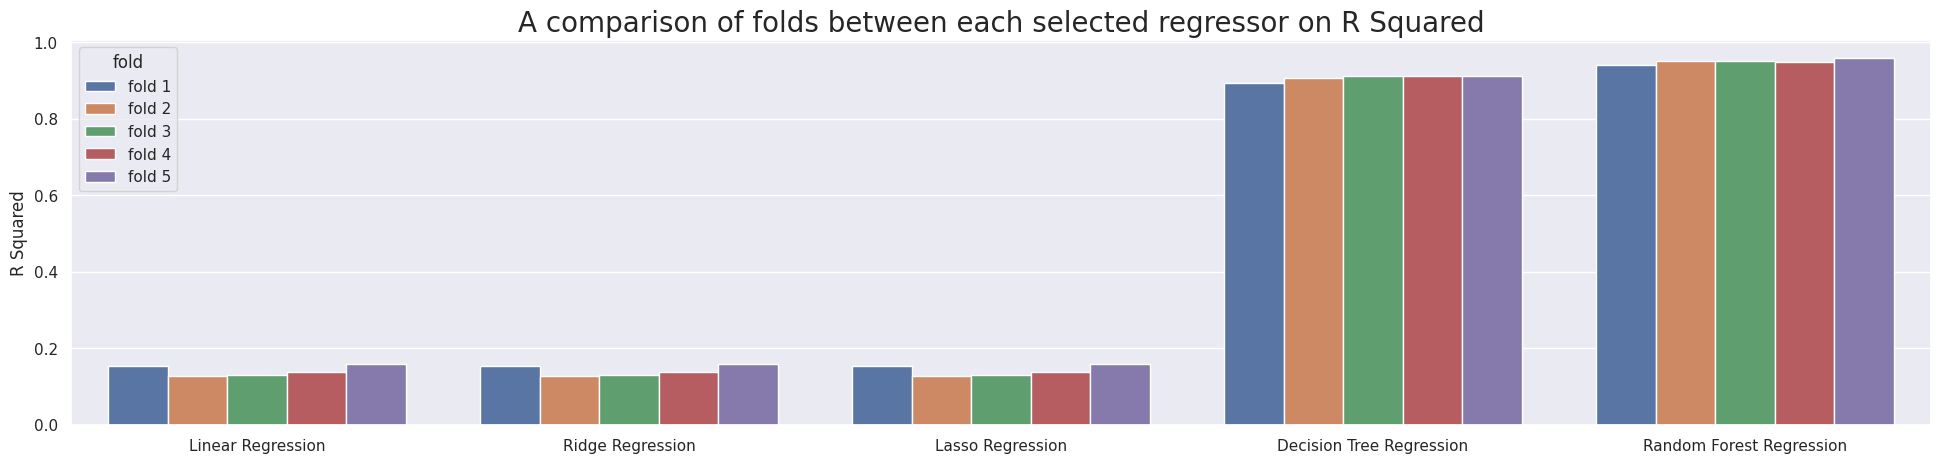

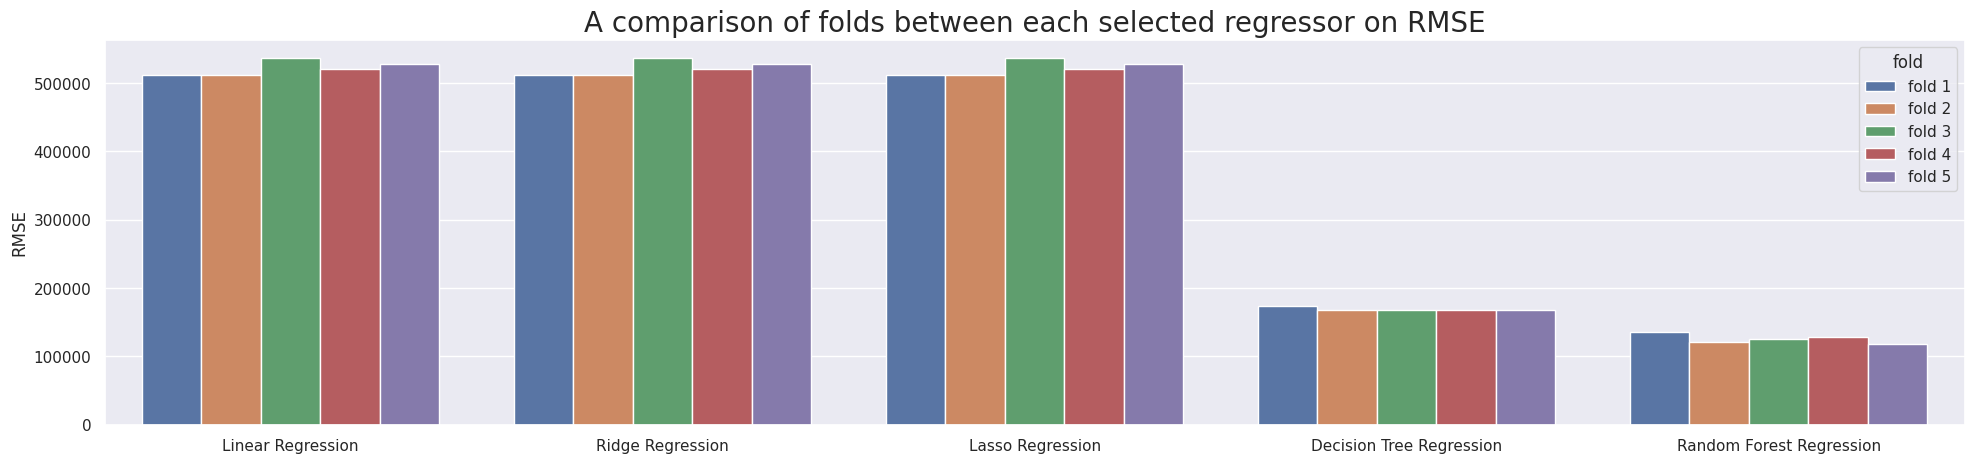

In [124]:
plot_compare_cross(reshape_cross_df(regressors, X_train, y_train, cv=5, scoring='r2'), score_name='R Squared')
print('\n')
plot_compare_cross(reshape_cross_df(regressors, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'), score_name='RMSE')

จากกราฟแท่งเทียบแต่ละ Fold ของแต่ละ Regressor จะเห็นได้ว่า Fold ที่ 5 จะให้ประสิทธิภาพที่ดีที่สุดจาก Fold ทุก Fold

## Result

สร้างฟังก์ชันสำหรับพล็อตกราฟแสดงความแตกต่างระหว่างค่า actual และค่า predicted เพื่อดูความแตกต่างระหว่างค่าในแต่ละจุด

In [125]:
def plot_ypred_vs_ytest(regressor):
  regressor.fit(X_train, y_train)
  #plot y_pred vs y_test
  y_pred = regressor.predict(X_test)
  range = np.arange(0, len(y_test))

  fig, ax = plt.subplots(figsize=(25, 4))
  ax.grid(False)

  ax.plot(range, y_pred, c='orange')
  ax.plot(range, y_test, c='royalblue')

  plt.legend(['Prediction', 'Ground Truth'])
  plt.show()

  #plot y_pred vs y_test, but with data sorted in ascending order
  idx = np.argsort(y_test)

  fig, ax = plt.subplots(figsize=(25, 4))
  ax.grid(False)

  ax.plot(range, y_pred[idx], c='orange')
  ax.plot(range, y_test.iloc[idx], c='royalblue')

  plt.legend(['Prediction', 'Ground Truth'])

  plt.show()

ดูการกระจายของตัวแปรเป้าหมาย Weekly_Sales โดยพล็อตกราฟฮิสโตแกรม เพื่อที่จะกำหนดว่าเราจะใช้ค่าเฉลี่ยหรือค่ามัธยฐานเป็นตัววัดสถิติในการตัดสินใจวิเคราะห์ข้อมูล

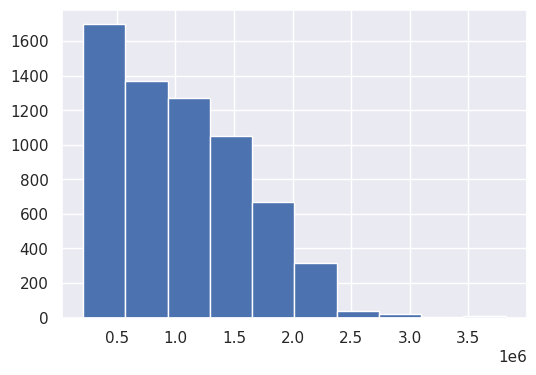

In [126]:
df_copy['Weekly_Sales'].hist(figsize=(6,4))
plt.show()

จาก histogram plot เราดูเห็นได้ว่าการกระจายของตัวแปรเป้าหมายเป็นการกระจายแบบ Right-skewed distribution ดังนั้นเราจะใช้ค่ามัธยฐานเป็นตัววัดสถิติ เนื่องจากมัธยฐานเป็นการวัดค่าที่ robust เหมาะสมกับการกระจายข้อมูลแบบนี้และสามารถรับมือกับ Outlier ได้ดีกว่าค่าเฉลี่ย

### Visualizing Multiple Linear Regression

เทรนโมเดลด้วยคำสั่ง fit

In [127]:
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

ค่าพารามิเตอร์ของโมเดลมีดังนี้

In [128]:
linear_regressor.coef_

array([-15076.40215999,  25071.86628767,  -1105.13707993,  53045.08973449,
        -2147.39728938,  26267.93457823, -37155.8508808 ,  11054.53472701,
        -1323.57835544])

ค่าจุดตัดแกนของโมเดลคือ

In [129]:
linear_regressor.intercept_

73901024.50215305

แสดงแต่ละ feature กับค่าพารามิเตอร์ของตัวมัน

In [130]:
list(zip(X.columns, linear_regressor.coef_.round(2)))

[('Store', -15076.4),
 ('Holiday_Flag', 25071.87),
 ('Temperature', -1105.14),
 ('Fuel_Price', 53045.09),
 ('CPI', -2147.4),
 ('Employment', 26267.93),
 ('Year', -37155.85),
 ('Month', 11054.53),
 ('Day', -1323.58)]

**จากสูตร Multiple Linear Regression :**

$ Y = β_0 + β_1X_1 + β_2X_2 + ... + β_pX_p $ 

**สูตรจาก dataset(ยังไม่มี coeficient) :**

(Weekly_Sales) = (Intecept) + $β_1$(Store) + $β_2$(Holiday_Flag) + $β_3$(Temperature) + $β_4$(Fuel_Price) + $β_5$(CPI) + $β_6$(Employment) + $β_7$(Year) + $β_8$(Month) + $β_9$(Day)

**สูครสุดท้ายของ dataset ชุดนี้:**

Weekly_Sales = 73901024.50 - 15076.40(Store) + 25071.87(Holiday_Flag) - 1105.14(Temperature) + 53045.09(Fuel_Price) - 2147.4(CPI) + 26267.93(Employment) - 37155.85(Year) + 11054.53(Month) - 1323.58(Day)

**พล็อตกราฟเปรียบเทียบค่า actual กับค่า predicted ของโมเดล Linear Regression**

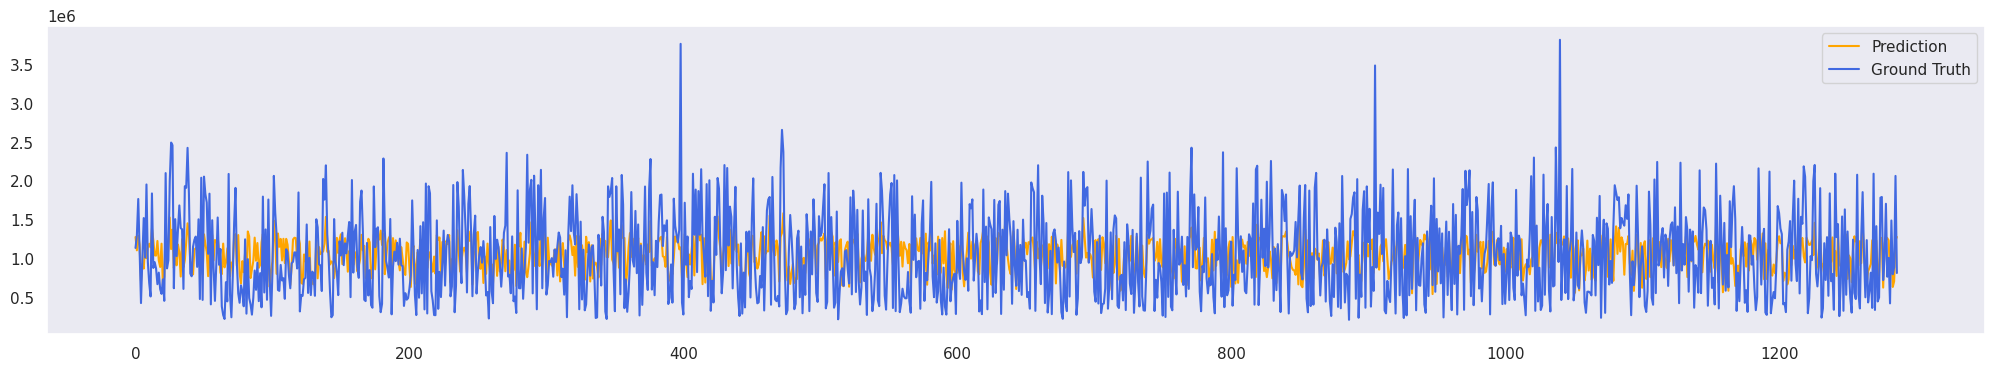

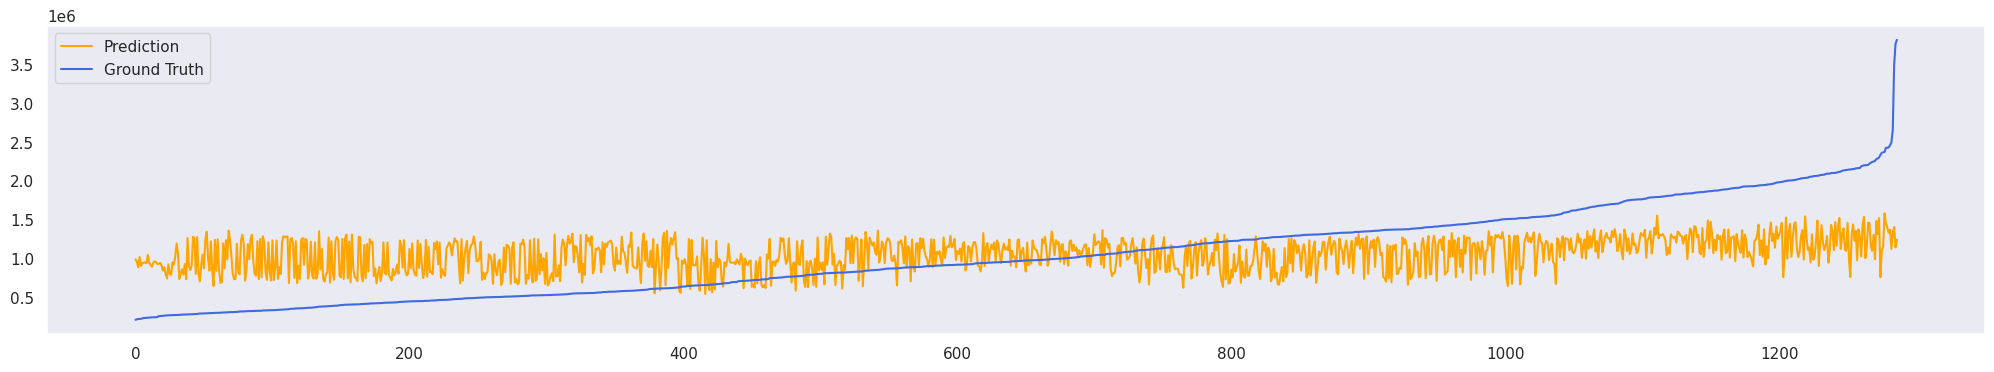

In [131]:
plot_ypred_vs_ytest(linear_regressor)

**พล็อต Scatter plot พร้อมเส้น Regression line ของโมเดลและ dataset นี้**

<Axes: xlabel='Weekly_Sales'>

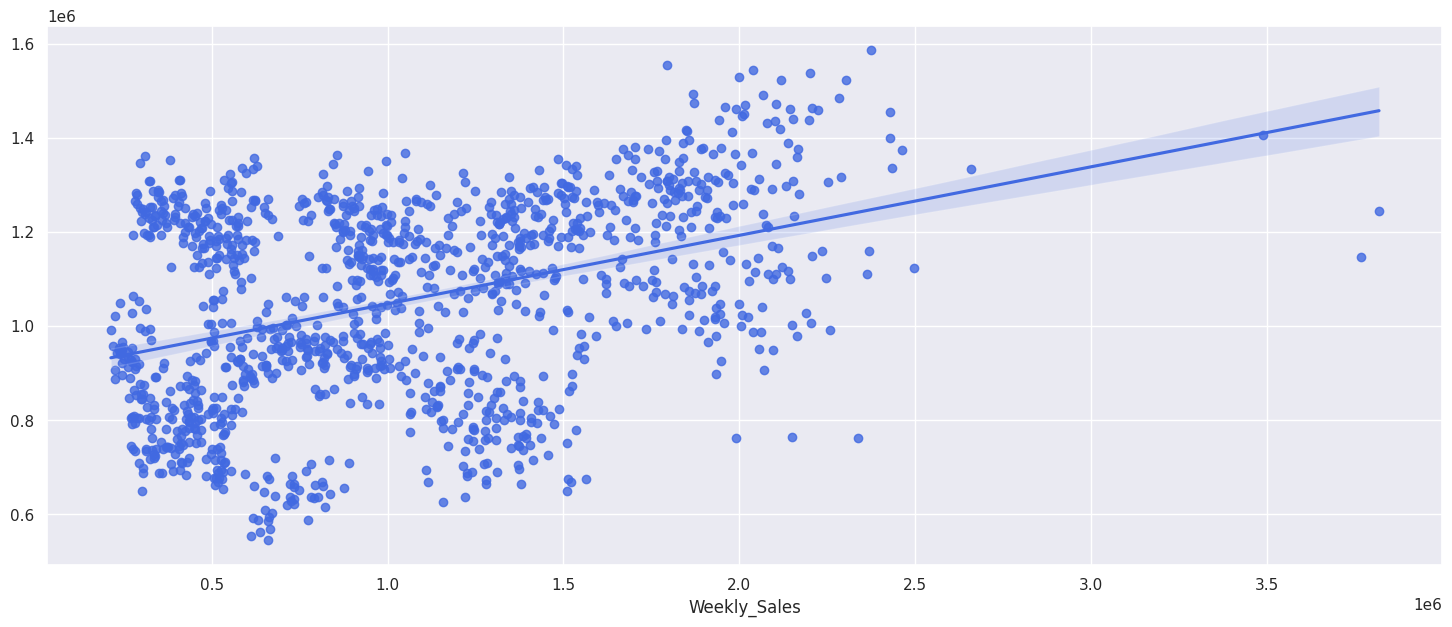

In [132]:
plt.figure(figsize=(18, 7))
sns.regplot(x=y_test, y=y_pred, ci=95, color ='royalblue')

**คำนวณค่า Percentage Error จากค่า RMSE**

Percentage Error = (RMSE / Median of target variable) * 100

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [134]:
med = y.median()
r_square = round(r2_score(y_test, y_pred), 2)
percentage_error = float(round((rmse/med) * 100, 2))

In [135]:
print(f'\033[1m สรุปผลที่ได้จากการทำโมเดล Multiple Linear Regressor มีค่า R square เท่ากับ {r_square} และ percentage error เท่ากับ{percentage_error}% โดยมีค่า Root Mean Squared Error เท่ากับ (RMSE of {rmse.astype(float).round(2)})')

 สรุปผลที่ได้จากการทำโมเดล Multiple Linear Regressor มีค่า R square เท่ากับ 0.15 และ percentage error เท่ากับ54.38% โดยมีค่า Root Mean Squared Error เท่ากับ (RMSE of 522417.7)


---------

### Hyperparameter tuning and Visualizing Ridge Regression

เทรนโมเดลด้วยคำสั่ง fit

In [136]:
ridge_regressor.fit(X_train, y_train)
y_pred = ridge_regressor.predict(X_test)

วนซ้ำค่า Hyperparameter ที่มีชื่อว่า alpha ของโมเดล Ridge Regression ด้วยค่า alpha ที่ต่างกัน โดยสร้าง list ชื่อ alpha_values ที่เก็บค่า alpha และในแต่ละการวนซ้ำให้เทรนโมเดลโดยกำหนด Hyperparameter ไปตามการวนซ้ำนั้นๆ และทำการประเมินโมเดลโดยใช้ค่า RMSE และทำการเพิ่ม RMSE เข้าไปใน list score ที่สร้างไว้ และทำการสร้าง dataframe ชื่อ results_df โดยมีคอลัมน์ของ alpha_values และ score (RMSE)

In [137]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
score = []
for alpha in alpha_values:
  ridge_regressor = Ridge(alpha=alpha)
  ridge_regressor.fit(X_train, y_train)
  y_pred = ridge_regressor.predict(X_test)
  score.append(np.sqrt(mean_squared_error(y_test, y_pred)))

results_df = pd.DataFrame({'alpha':alpha_values, 'RMSE':score})
results_df

,alpha,RMSE
0,0.001,522417.699044
1,0.010,522417.726821
2,0.100,522418.004505
3,1.000,522420.773473
4,10.000,522447.693299
5,100.000,522655.251411


ค่า RMSE สำหรับแต่ละค่า alpha ใน Ridge Regression ไม่แตกต่างกันมากนัก ดังนั้นเราจะใช้ค่า alpha เดิมที่เป็นค่า default ต่อไป (alpha=1.0)

In [138]:
first_result.loc[(first_result['regressor_name'] == 'Linear Regression') | (first_result['regressor_name'] == 'Ridge Regression')]

,regressor_name,RMSE,R2_Score
2,Linear Regression,522417.695958,0.152828
4,Ridge Regression,522420.773473,0.152818


เมื่อเทียบกับ Linear Regression ที่มีค่า alpha=0 จะเห็นได้ว่า Ridge Regression มีประสิทธิภาพที่แย่กว่าด้วยซ้ำ

In [139]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

Ridge()

**พล็อตกราฟค่าเป้าหมายและค่าทำนายจากโมเดล Ridge Regression**

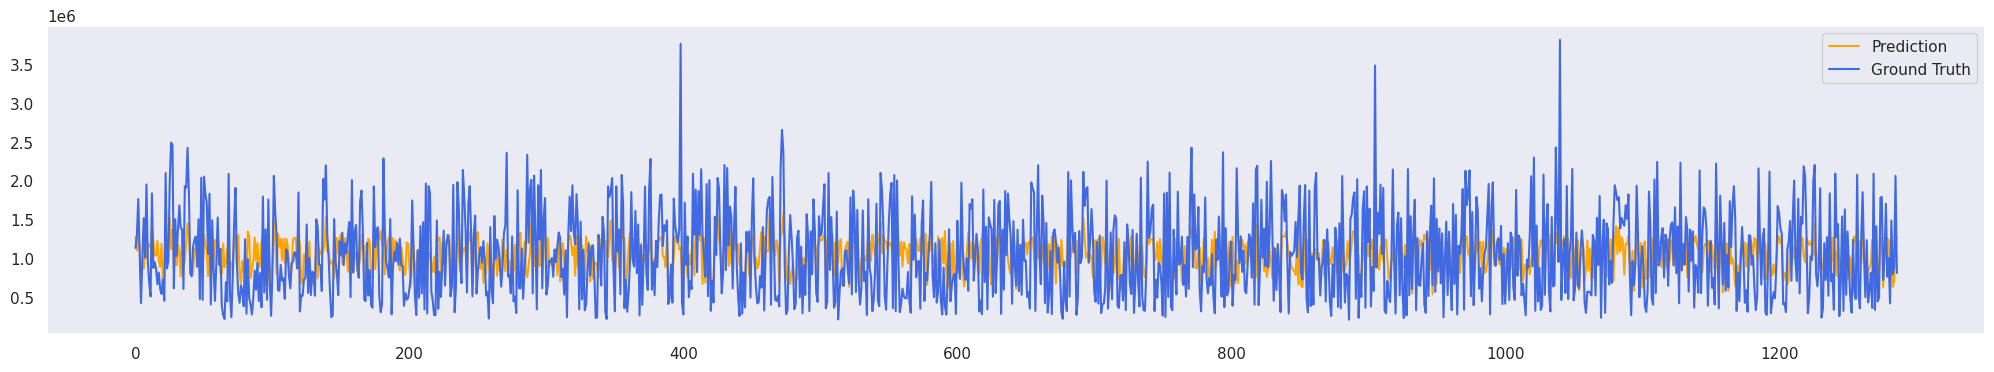

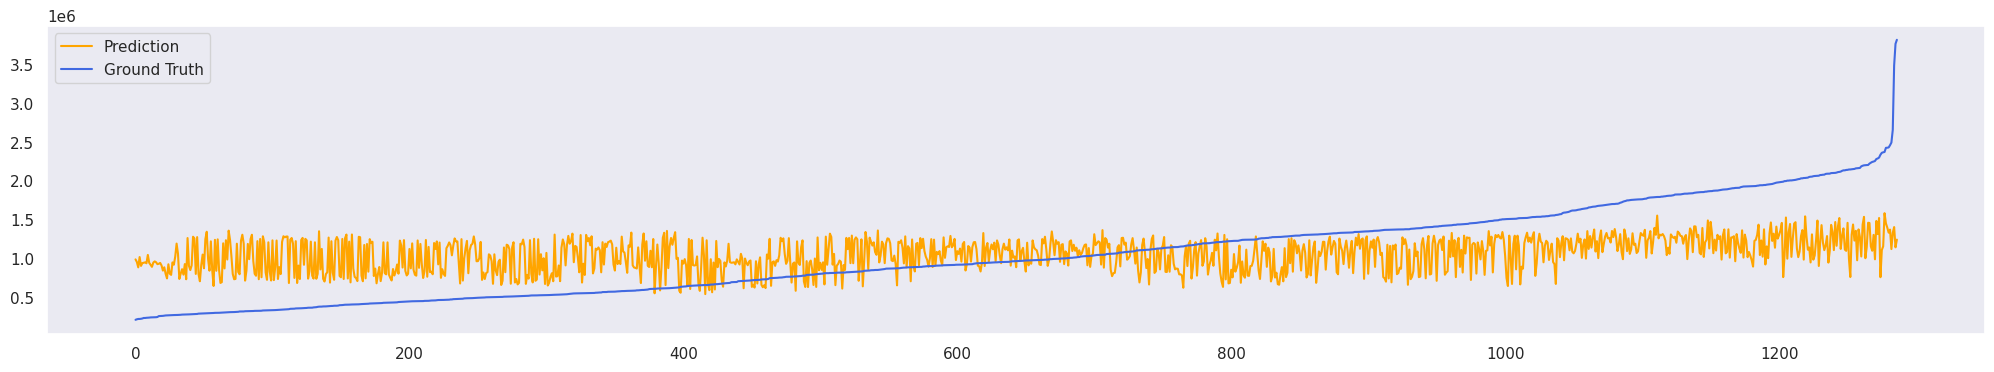

In [140]:
plot_ypred_vs_ytest(ridge_regressor)

**พล็อต Scatter plot พร้อมเส้น Regression line ของโมเดลและ dataset นี้**

<Axes: xlabel='Weekly_Sales'>

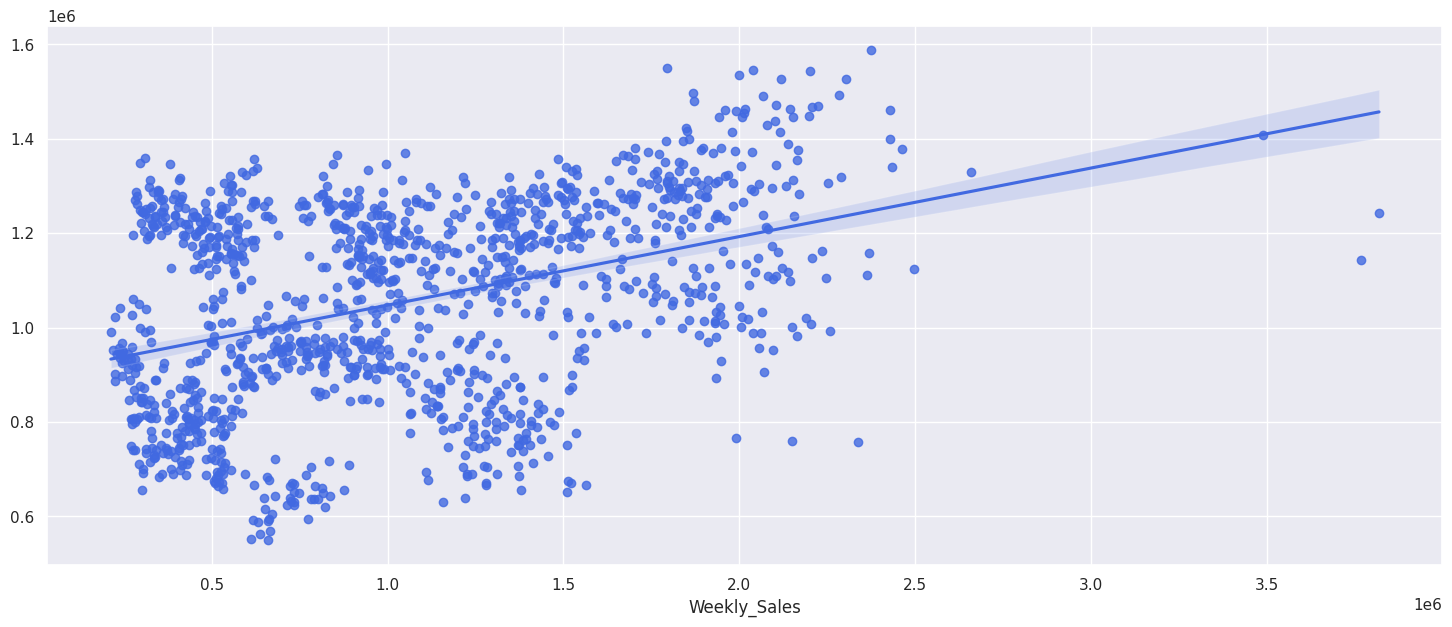

In [141]:
plt.figure(figsize=(18, 7))
sns.regplot(x=y_test, y=y_pred, ci=95, color ='royalblue')

**คำนวณค่า Percentage Error จากค่า RMSE**

Percentage Error = (RMSE / Median of target variable) * 100

In [142]:
y_pred = ridge_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [143]:
med = y.median()
r_square = round(r2_score(y_test, y_pred), 2)
percentage_error = float(round((rmse/med) * 100, 2))

In [144]:
print(f'\033[1m สรุปผลที่ได้จากการทำโมเดล Ridge Regressor มีค่า R square เท่ากับ {r_square} และ percentage error เท่ากับ {percentage_error}% โดยมีค่า Root Mean Squared Error เท่ากับ (RMSE of {rmse.astype(float).round(2)})')

 สรุปผลที่ได้จากการทำโมเดล Ridge Regressor มีค่า R square เท่ากับ 0.15 และ percentage error เท่ากับ 54.38% โดยมีค่า Root Mean Squared Error เท่ากับ (RMSE of 522420.77)


### Hyperparameter tuning and Visualizing Lasso Regression

เทรนโมเดลด้วยคำสั่ง fit

In [145]:
lasso_regressor.fit(X_train, y_train)
y_pred = lasso_regressor.predict(X_test)

วนซ้ำค่า Hyperparameter ที่มีชื่อว่า alpha ของโมเดล Lasso Regression ด้วยค่า alpha ที่ต่างกัน โดยสร้าง list ชื่อ alpha_values ที่เก็บค่า alpha และในแต่ละการวนซ้ำให้เทรนโมเดลโดยกำหนด Hyperparameter ไปตามการวนซ้ำนั้นๆ และทำการประเมินโมเดลโดยใช้ค่า RMSE และทำการเพิ่ม RMSE เข้าไปในลิส list score ที่สร้างไว้ และทำการสร้าง dataframe ชื่อ results_df โดยมีคอลัมน์ของ alpha_values และ score (RMSE)

In [146]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
score = []
for alpha in alpha_values:
  lasso_regressor = Lasso(alpha=alpha)
  lasso_regressor.fit(X_train, y_train)
  y_pred = lasso_regressor.predict(X_test)
  score.append(np.sqrt(mean_squared_error(y_test, y_pred)))

results_df = pd.DataFrame({'alpha':alpha_values, 'RMSE':score})
results_df

,alpha,RMSE
0,0.001,522417.696263
1,0.010,522417.699007
2,0.100,522417.726482
3,1.000,522418.001490
4,10.000,522420.757654
5,100.000,522448.897885


ค่า RMSE สำหรับแต่ละค่า alpha ใน Lasso Regression ไม่แตกต่างกันมากนัก ดังนั้นเราจะใช้ค่า alpha เดิมที่เป็นค่า default ต่อไป (alpha=1.0)

In [147]:
first_result.loc[(first_result['regressor_name'] == 'Linear Regression') | (first_result['regressor_name'] == 'Lasso Regression')]

,regressor_name,RMSE,R2_Score
2,Linear Regression,522417.695958,0.152828
3,Lasso Regression,522418.001490,0.152827


เมื่อเทียบกับ Linear Regression ที่มีค่า alpha=0 จะเห็นได้ว่า Lasso Regression ก็ยังมีประสิทธิภาพที่แย่กว่า และประสิทธิภาพยังไม่ต่างจาก Ridge Regression มากนัก

In [148]:
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

Lasso()

**พล็อตกราฟค่าเป้าหมายและค่าทำนายจากโมเดล Lasso Regression**

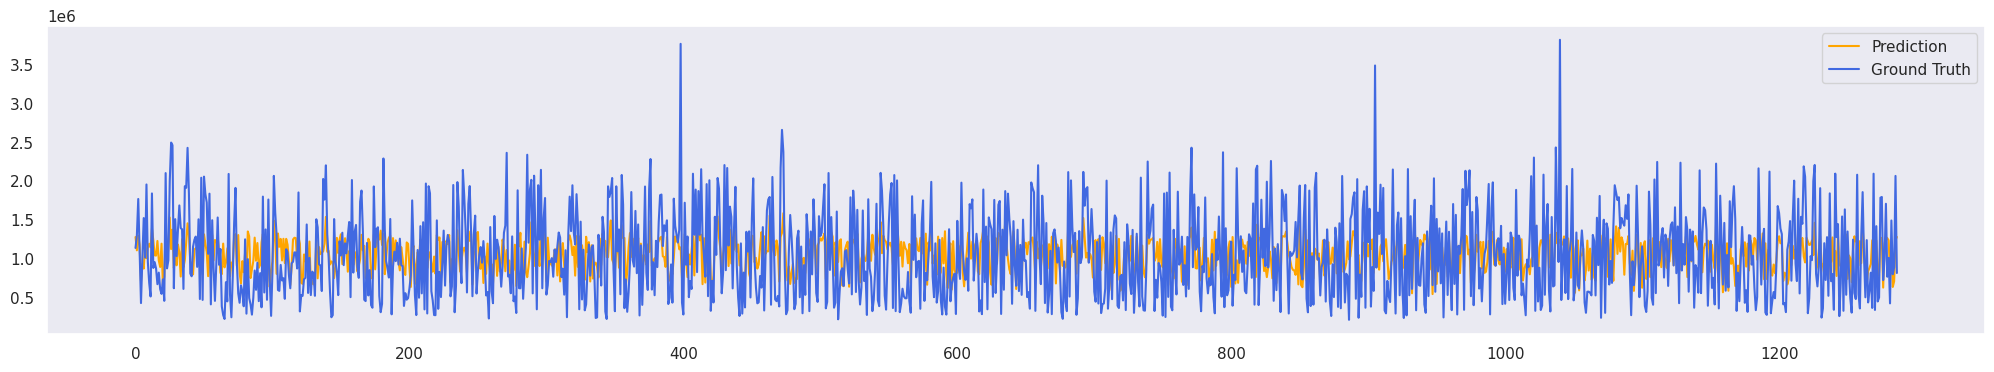

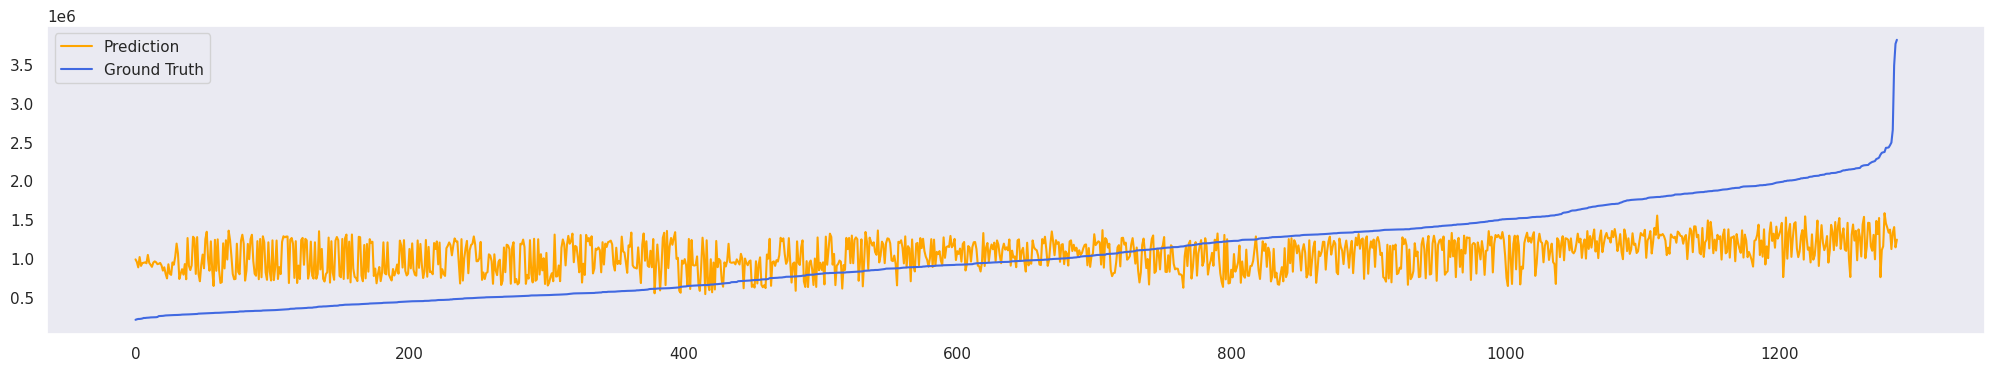

In [149]:
plot_ypred_vs_ytest(lasso_regressor)

**พล็อต Scatter plot พร้อมเส้น Regression line ของโมเดลและ dataset นี้**

<Axes: xlabel='Weekly_Sales'>

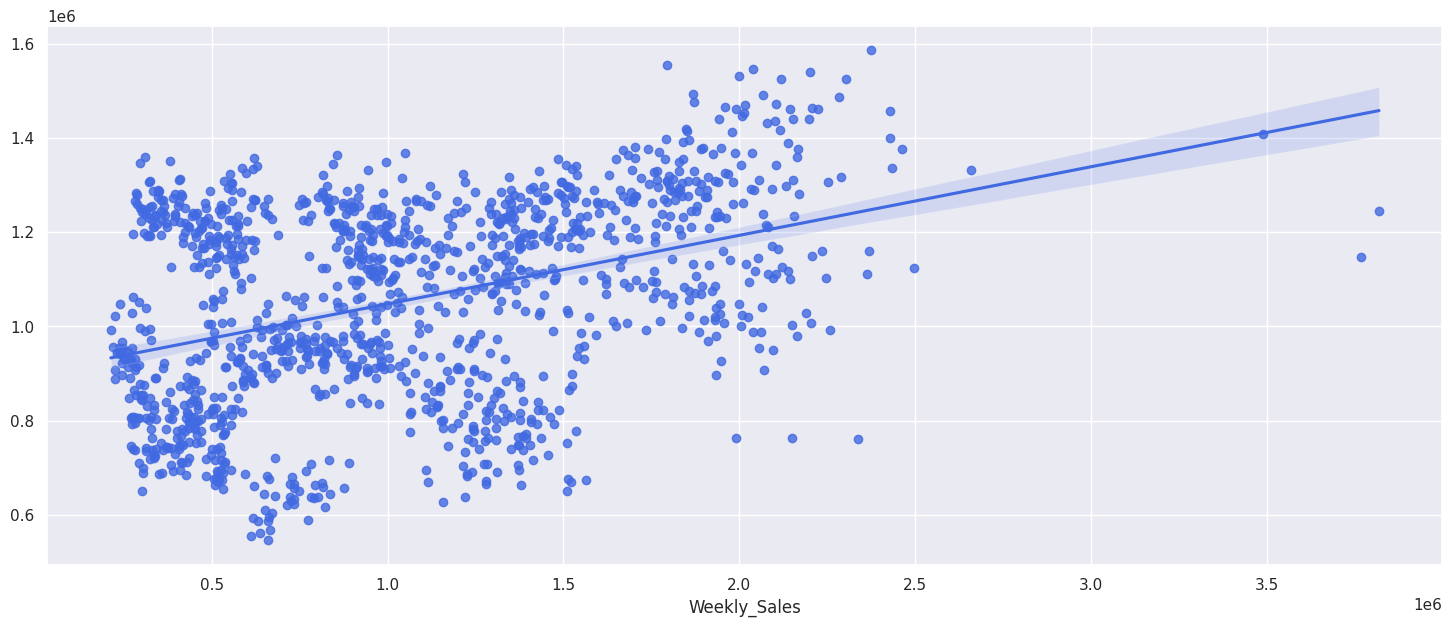

In [150]:
plt.figure(figsize=(18, 7))
sns.regplot(x=y_test, y=y_pred, ci=95, color ='royalblue')

**คำนวณค่า Percentage Error จากค่า RMSE**

Percentage Error = (RMSE / Median of target variable) * 100

In [151]:
y_pred = lasso_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [152]:
med = y.median()
r_square = round(r2_score(y_test, y_pred), 2)
percentage_error = float(round((rmse/med) * 100, 2))

In [153]:
print(f'\033[1m สรุปผลที่ได้จากการทำโมเดล Lasso Regressor มีค่า R square เท่ากับ {r_square} และ percentage error เท่ากับ {percentage_error}% โดยมีค่า Root Mean Squared Error เท่ากับ (RMSE of {rmse.astype(float).round(2)})')

 สรุปผลที่ได้จากการทำโมเดล Lasso Regressor มีค่า R square เท่ากับ 0.15 และ percentage error เท่ากับ 54.38% โดยมีค่า Root Mean Squared Error เท่ากับ (RMSE of 522418.0)


### Hyperparameter tuning and Visualizing Decision Tree Regression

เทรนโมเดลด้วยคำสั่ง fit

In [154]:
decision_tree_regressor.fit(X_train, y_train)
y_pred = decision_tree_regressor.predict(X_test)

พล็อต tree ของ decision_tree_regressor ด้วยคำสั่ง plot_tree จาก sklearn.tree โดยให้พล็อตออกมาลึกถึงแค่ 2 ชั้น (max_depth = 2)

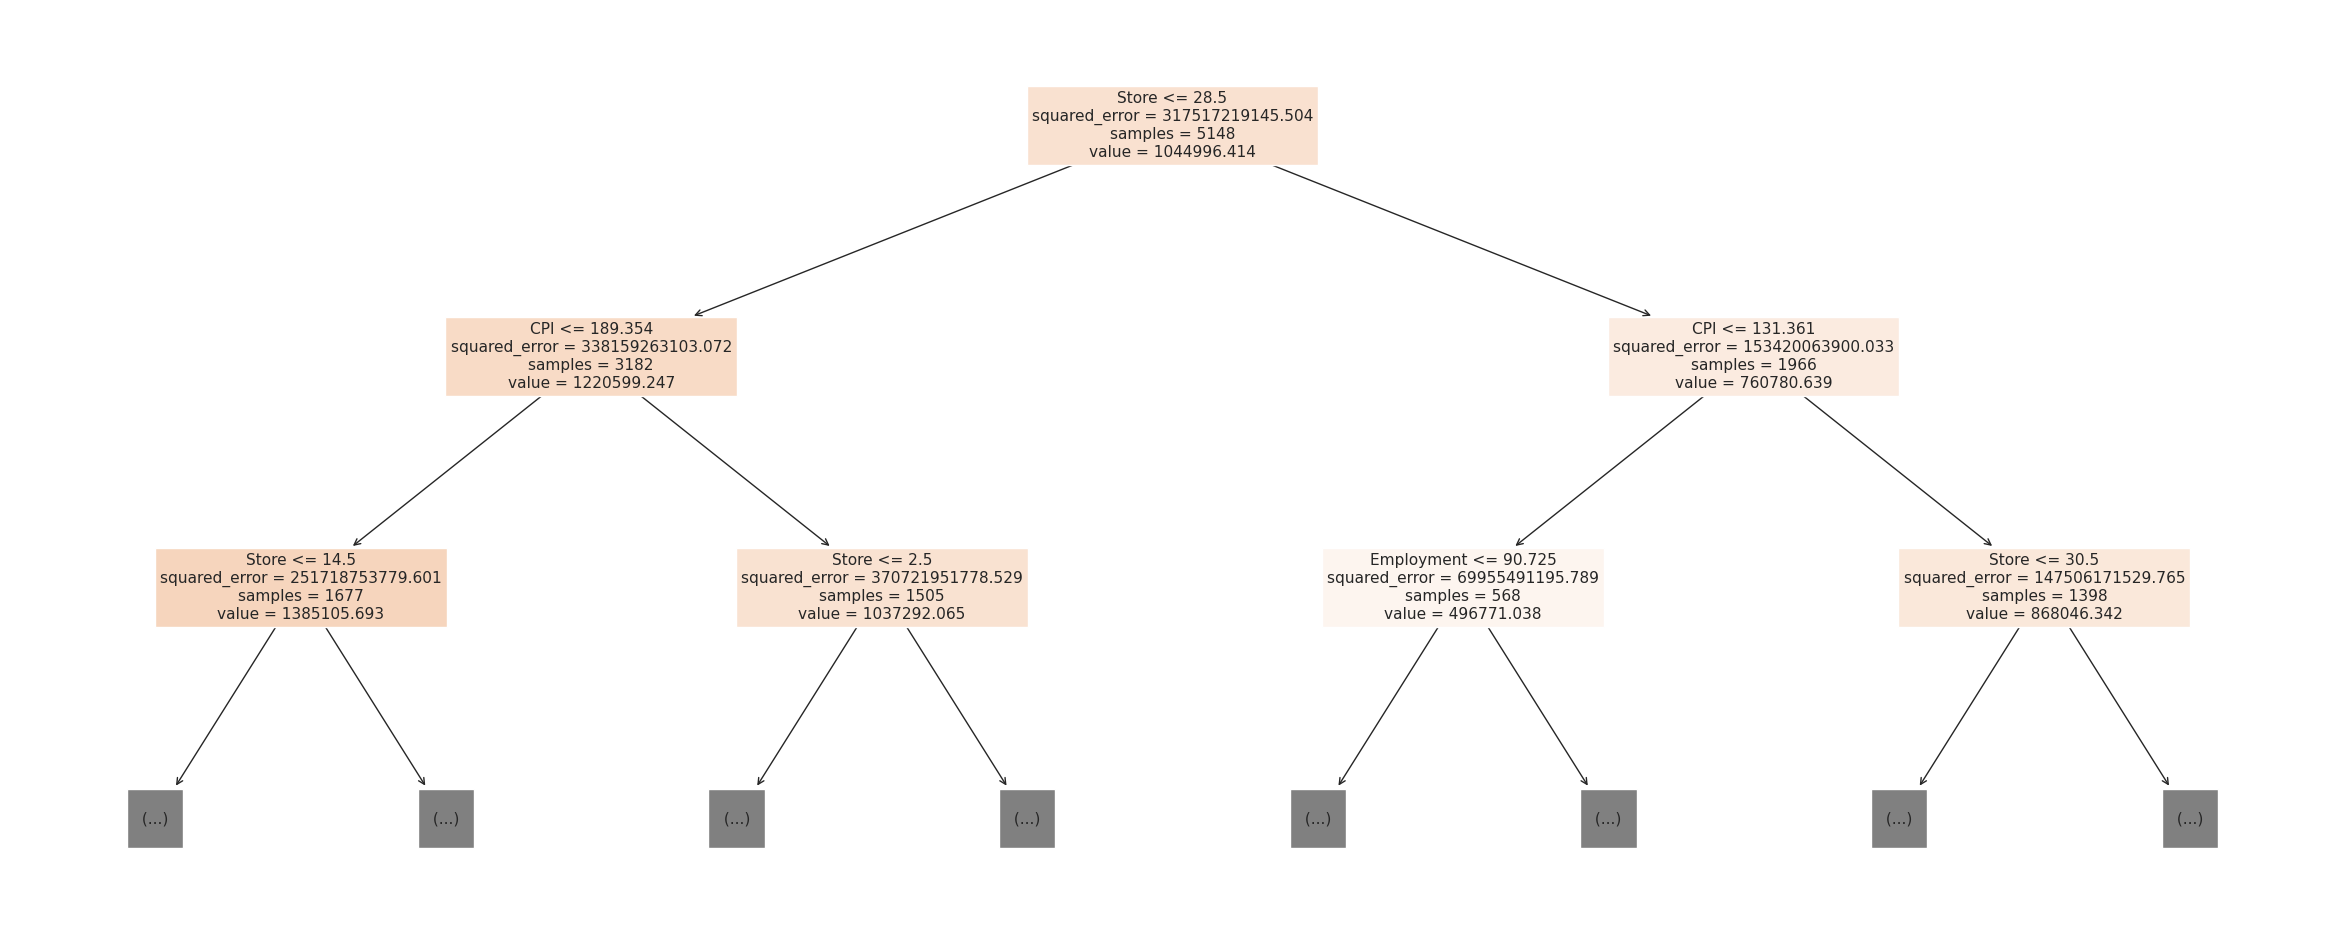

In [155]:
plt.figure(figsize=(30, 12))
plot_tree(decision_tree_regressor, max_depth=2, feature_names = list(X.columns), filled=True)

plt.show()

วนซ้ำค่า Hyperparameter ที่มีชื่อว่า max_depth ของโมเดล Decision Tree Regressor มีค่าตั้งแต่ 1 ถึง 20 และในแต่ละการวนซ้ำให้เทรนโมเดลโดยกำหนด Hyperparameter ไปตามการวนซ้ำนั้นๆ และทำการประเมินโมเดลผ่านฟังก์ชัน cross_val_score โดยใช้ตัว scoring เป็น RMSE และทำการเพิ่ม RMSE เข้าไปใน list scores ที่สร้างไว้และทำการสร้าง dataframe ชื่อ results_df โดยมีคอลัมน์ของ max_depth และ scores (RMSE)

In [156]:
max_depth = np.arange(1,21)
scores = []
for depth in max_depth:
  model = DecisionTreeRegressor(max_depth=depth)
  cv_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
  scores.append(cv_scores.min())

results_df = pd.DataFrame({'max_depth': max_depth, 'RMSE': scores})

ทำการพล็อตกราฟเส้นเพื่อเปรียบเทียบค่า RMSE ของแต่ละ max_depth ของโมเดล Decision Tree Regressor

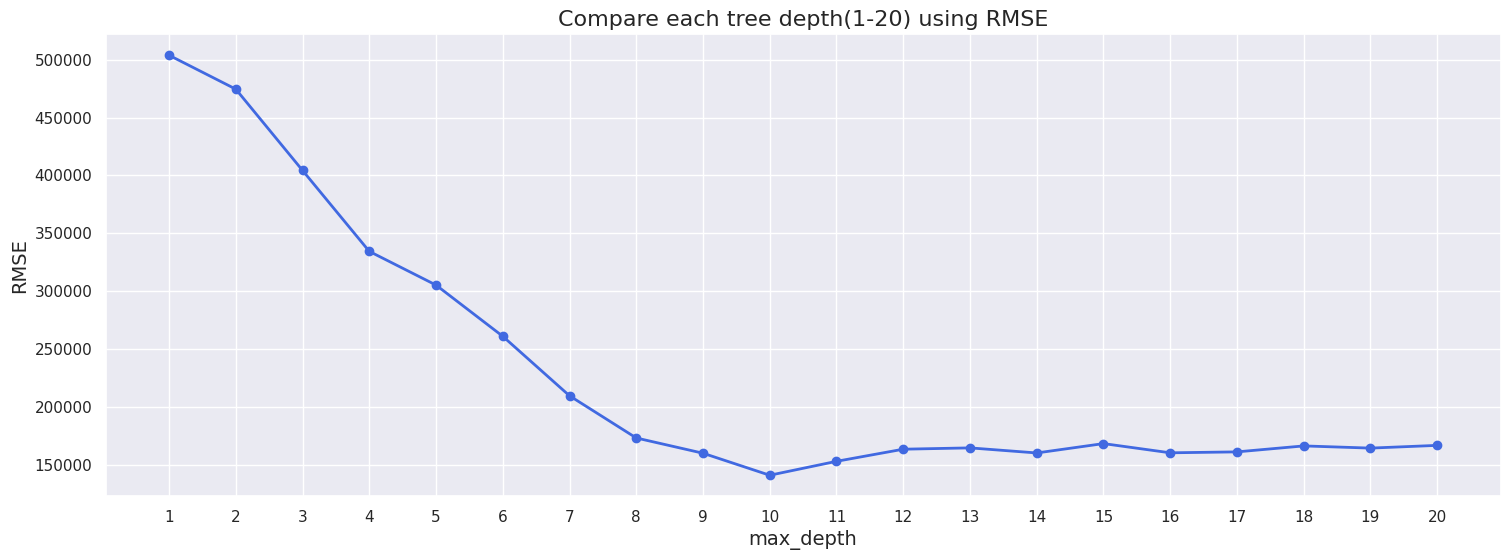

In [157]:
plt.figure(figsize=(18,6))
plt.plot(results_df.max_depth, results_df.RMSE, '-o', c='royalblue', linewidth=2)

plt.title('Compare each tree depth(1-20) using RMSE', fontsize=16)
plt.xlabel('max_depth', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(1, 21))

plt.show()

เปรียบเทียบ RMSE ของ Decision Tree Regressor ที่มีความลึกของต้นไม้เท่ากับ 10 กับ Decision Tree Regressor ที่ไม่จำกัด max_depth

In [158]:
results_df.loc[results_df['max_depth'] == 10]

,max_depth,RMSE
9,10,141135.079386


In [159]:
first_result.loc[first_result['regressor_name'] == 'Decision Tree Regression'].drop('R2_Score', axis=1)

,regressor_name,RMSE
1,Decision Tree Regression,147766.665739


Decision Tree Regression ที่ไม่มีการจำกัด max_depth ยังคงมีประสิทธิภาพดีกว่า max_depth = 10 แต่หากไม่มีการจำกัดความลึกของต้นไม้อาจทำให้โมเดลเกิดความ overfitting ดังนั้นเราจะตรวจสอบการ overfitting เพื่อหาว่าโมเดลเริ่มเกิด overfitting จากความลึกที่มากที่สุดจุดไหนขึ้นไป

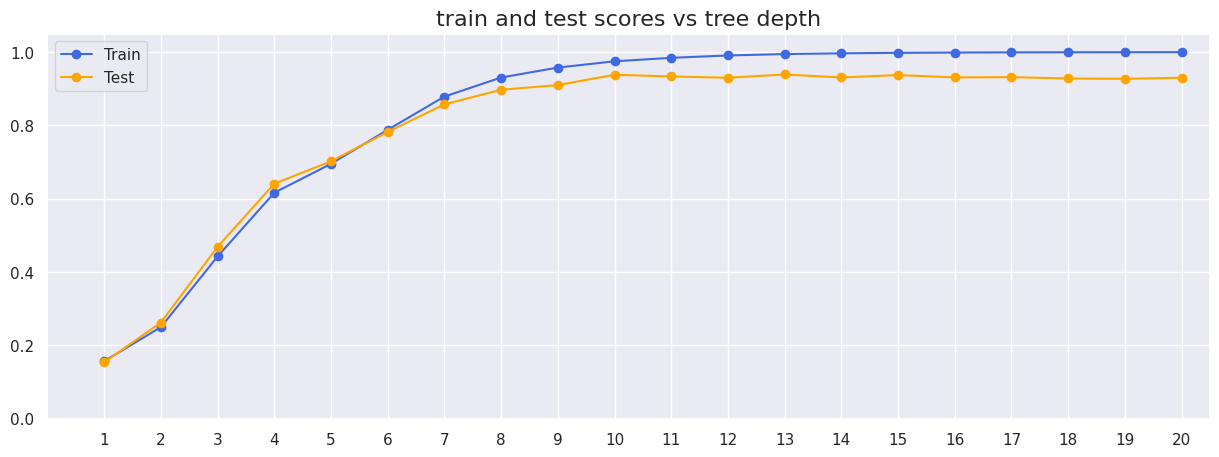

In [160]:
train_scores = []
test_scores = []
for depth in max_depth:
  model = DecisionTreeRegressor(max_depth=depth)
  model.fit(X_train, y_train)
  # evaluate on the train dataset
  train_pred = model.predict(X_train)
  train_acc = r2_score(y_train, train_pred)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_pred = model.predict(X_test)
  test_acc = r2_score(y_test, test_pred)
  test_scores.append(test_acc)

# plot of train and test scores vs tree depth
plt.figure(figsize=(15, 5))
plt.plot(max_depth, train_scores, '-o', label='Train', c='royalblue')
plt.plot(max_depth, test_scores, '-o', label='Test', c='orange')

plt.title('train and test scores vs tree depth', fontsize=16)
plt.xlim([0, max(max_depth)+0.5])
plt.ylim([0, 1+0.05])
plt.xticks(np.arange(1, 21))
plt.legend()

plt.show()

เราสามารถเห็นได้ว่า ค่า accuracy (r squared) บน test set ดีขึ้นเมื่อ tree depth เพิ่มขึ้นจนถึงระดับสิบหรือสิบเอ็ดระดับ และหลังจากนั้นค่า accuracy จะเริ่มที่จะลดลงเมื่อเพิ่ม tree depth

นี่เป็นสิ่งที่เราคาดหวังว่าจะเห็นใน pattern ของ overfitting

ด้วยค่า RMSE ที่ต่ำที่สุดและตอนที่โมเดลเริ่มเรียนรู้จากชุดข้อมูล training แต่ก่อนที่จะเกิดการ overfitting เราจะเลือก tree depth ที่เท่ากับสิบ

In [161]:
results_df.loc[results_df['max_depth'] == 10]

,max_depth,RMSE
9,10,141135.079386


In [162]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=10)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

**พล็อตกราฟ actual vs predict values ของ Decision Tree Regression**

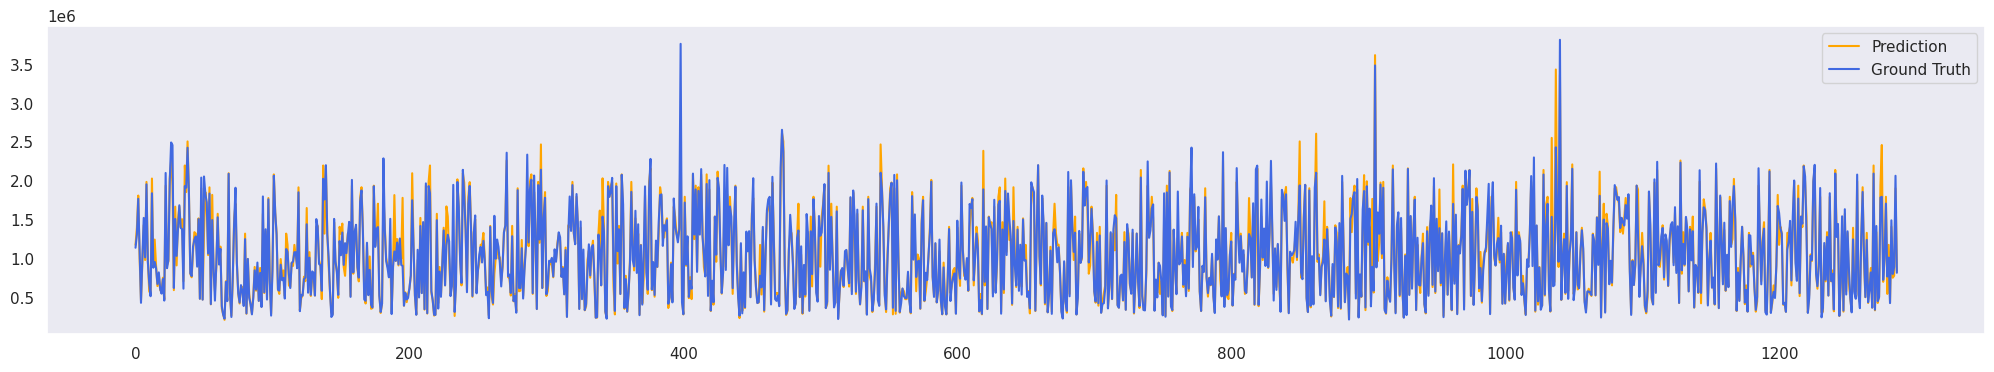

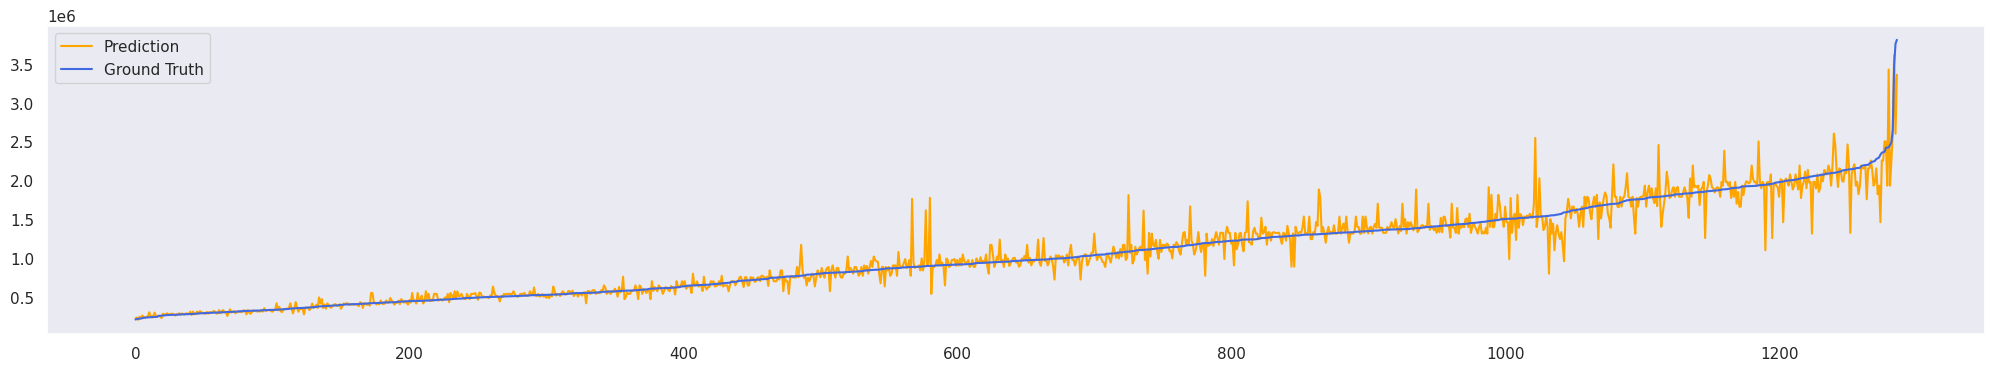

In [163]:
plot_ypred_vs_ytest(decision_tree_regressor)

**พล็อต Scatter plot พร้อมเส้น Regression line ของโมเดลและ dataset นี้**

<Axes: xlabel='Weekly_Sales'>

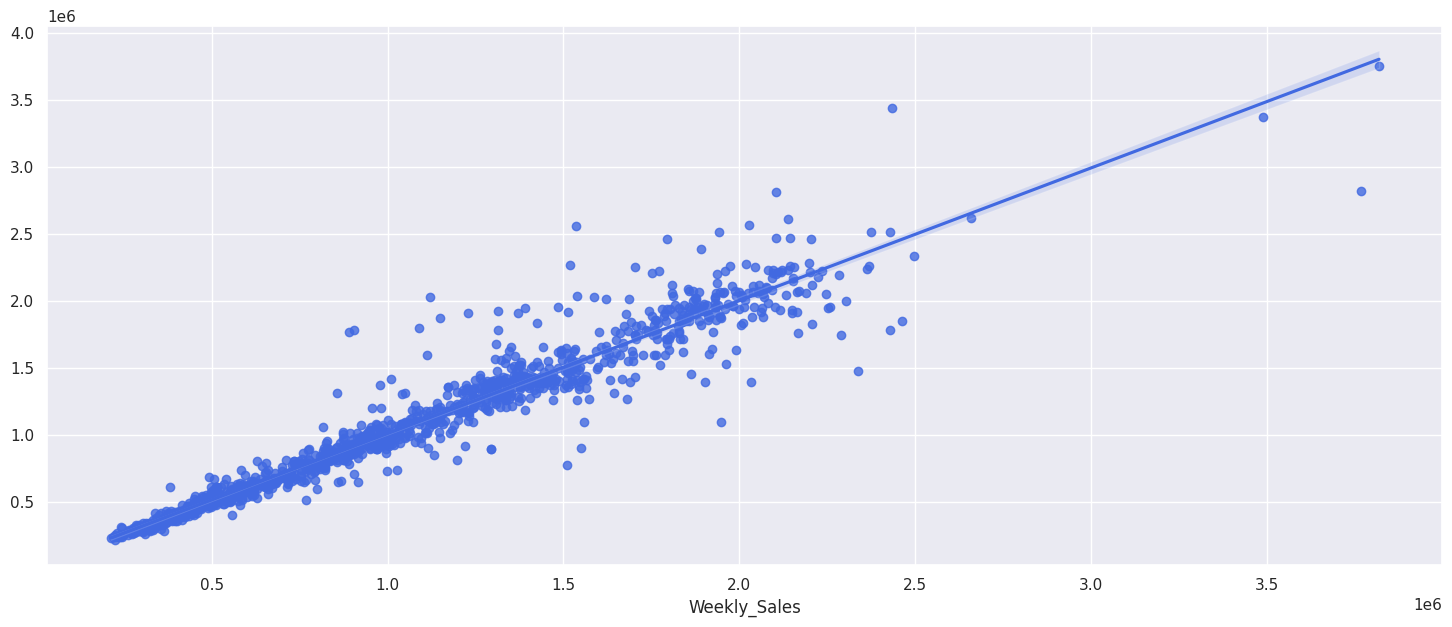

In [164]:
plt.figure(figsize=(18, 7))
sns.regplot(x=y_test, y=y_pred, ci=95, color='royalblue')

**การตรวจสอบความสำคัญของแต่ละตัวแปร(feature) ใน Decision Tree Regressor**

In [165]:
pd.DataFrame({'Variable':X.columns,
              'Importance':decision_tree_regressor.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,Store,0.656773
4,CPI,0.142185
5,Employment,0.130524
8,Day,0.021777
7,Month,0.015958
3,Fuel_Price,0.015345
2,Temperature,0.012598
1,Holiday_Flag,0.004744
6,Year,0.000096


**คำนวณค่า Percentage Error จากค่า RMSE**

Percentage Error = (RMSE / Median of target variable) * 100

In [166]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

148239.52612675235

In [167]:
med = y.median()
y_pred = decision_tree_regressor.predict(X_test)
r2 = round(r2_score(y_test, y_pred), 2)
percentage_error = float(round((rmse/med) * 100, 2))
depth = int(results_df.loc[results_df['max_depth'] == 10]['max_depth'])

In [168]:
print(f'\033[1m สรุปผลที่ได้จากการทำโมเดล Decision Tree Regressor ของข้อมูลชุดนี้ มีความลึกของต้น {depth} ความลึก \n มี R2 Score {r2} และมี percentage error เท่ากับ {percentage_error}% (RMSE of {rmse.astype(float).round(2)})')

 สรุปผลที่ได้จากการทำโมเดล Decision Tree Regressor ของข้อมูลชุดนี้ มีความลึกของต้น 10 ความลึก 
 มี R2 Score 0.94 และมี percentage error เท่ากับ 15.43% (RMSE of 148239.53)


### Hyperparameter tuning and Visualizing Random Forest Regression

เทรนโมเดลด้วยคำสั่ง fit โดยให้ Hyperparameter ของ Random Forest Regressor มีค่าของ max_depth เป็น 10 เนื่องจากเป็นระดับความลึกที่ทำให้โมเดลมีประสิทธิภาพดีที่สุด อ้างอิงจากการ Hyperparameter tuning ของ Decision Tree Regressor

In [184]:
random_forest_regressor = RandomForestRegressor(max_depth=10)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

วนซ้ำค่า Hyperparameter ที่มีชื่อว่า n_estimators(จำนวนต้นไม้) ของโมเดล Random Forest Regressor ด้วยค่า n_estimators ที่ต่างกัน โดยสร้าง list ชื่อ n_estimators และในแต่ละการวนซ้ำให้เทรนโมเดลโดยกำหนด Hyperparameter ไปตามการวนซ้ำนั้นๆ และทำการประเมินโมเดลผ่านฟังก์ชัน cross_val_score โดยใช้ตัว scoring เป็น RMSE และทำการเพิ่ม RMSE เข้าไปใน list scores ที่สร้างไว้และทำการสร้าง dataframe ชื่อ results_df โดยมีคอลัมน์ของ number of tree (n_estimators) และ scores (RMSE)

In [185]:
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000]
scores = []
for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, max_depth=10)
    cv_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    scores.append(cv_scores.mean())

results_df = pd.DataFrame({'number_of_trees': n_estimators, 'RMSE': scores})

ทำการพล็อตกราฟเส้นเพื่อเปรียบเทียบค่า RMSE ของแต่ละ number of tree ของโมเดล Random Forest Regressor

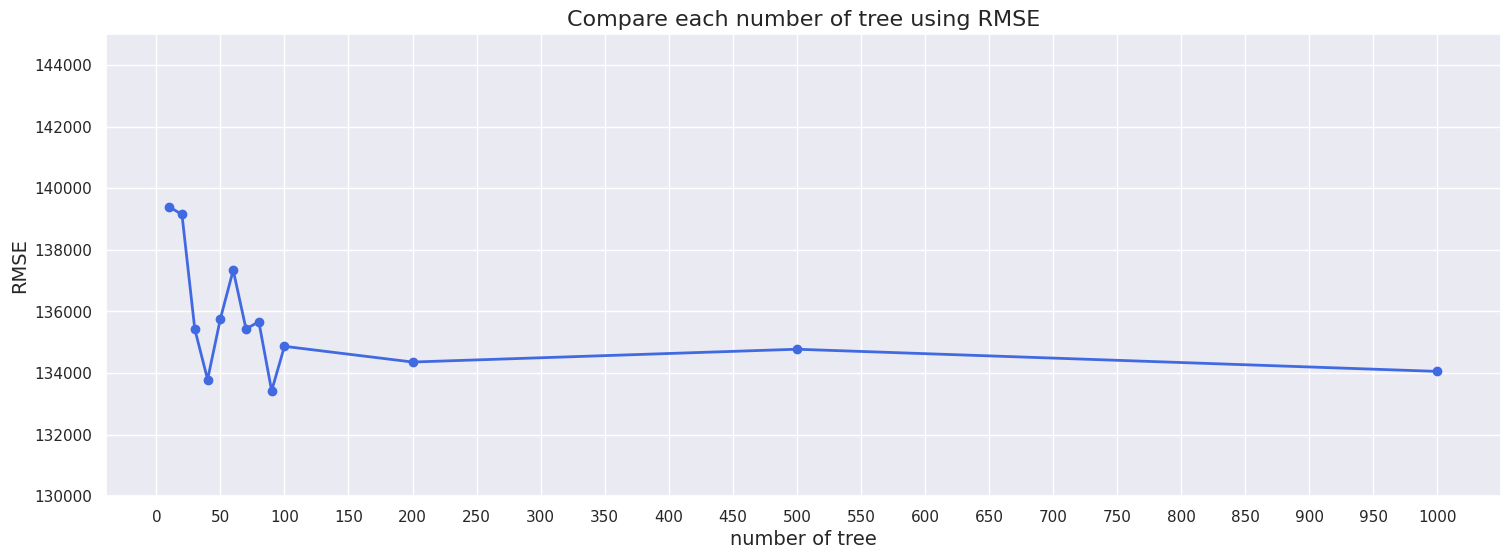

In [186]:
plt.figure(figsize=(18,6))
plt.plot(results_df.number_of_trees, results_df.RMSE, '-o', color='royalblue', linewidth=2)

plt.title('Compare each number of tree using RMSE', fontsize=16)
plt.xlabel('number of tree', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(np.arange(0, 1050, 50))
plt.ylim([130000, 145000])

plt.show()

แสดง results_df และเรียงลำดับ RMSE จากน้อยไปมาก เพื่อดูค่า number_of_trees เทียบกับ RMSE และเทียบกับ RMSE ของ Random Forest Regressor ที่ไม่มีการกำหนด max_depth ในตอนแรก

In [187]:
results_df.sort_values('RMSE', ignore_index=True)

,number_of_trees,RMSE
0,90,133423.425640
1,40,133790.230612
2,1000,134053.723197
3,200,134357.488247
4,500,134773.484425
5,100,134867.708749
6,30,135426.629817
7,70,135431.985147
8,80,135665.325313
9,50,135764.981716


In [173]:
first_result.loc[first_result['regressor_name'] == 'Random Forest Regression'].drop('R2_Score', axis=1)

,regressor_name,RMSE
0,Random Forest Regression,124619.892918


Random Forest Regressor ที่ไม่มีการกำหนด max_depth นั้นมีประสิทธิภาพมากกว่า Random Forest Regressor ที่กำหนดค่า max_depth = 10 ซึ่งนั่นก็เป็นไปตามการคาดการ์ณ แต่เราเลือกใช้ max_depth = 10 ต่อเพื่อหลีกเลี่ยงการ overfitting

จากการทดลองหลายครั้งพบว่า Random Forest Regression ที่ใช้ค่า default ของ number of trees(n_estimators=100) มีประสิทธิภาพต่ำหรือบางครั้งอาจจะดีกว่าเมื่อใช้จำนวนต้นไม้เพิ่มขึ้นเป็น 20, 30, 40, 50, 60, 70, 80, 90, 200, 500, และ 1000 ของ number of trees อย่างไรก็ตาม ผลการทดสอบแต่ละครั้งก็แตกต่างกันไป โดยก็อาจนำไปสู่การ overfitting ดังนั้นเราจะต้องทำการตรวจสอบว่าโมเดลเริ่มมีความ overfit ที่จำนวนต้นไม้เท่าใด

In [174]:
train_scores = []
test_scores = []
for n in n_estimators:
  model = RandomForestRegressor(n_estimators=n, max_depth=10)
  model.fit(X_train, y_train)
  # evaluate on the train dataset
  train_pred = model.predict(X_train)
  train_acc = r2_score(y_train, train_pred)
  train_scores.append(train_acc)
  # evaluate on the test dataset
  test_pred = model.predict(X_test)
  test_acc = r2_score(y_test, test_pred)
  test_scores.append(test_acc)

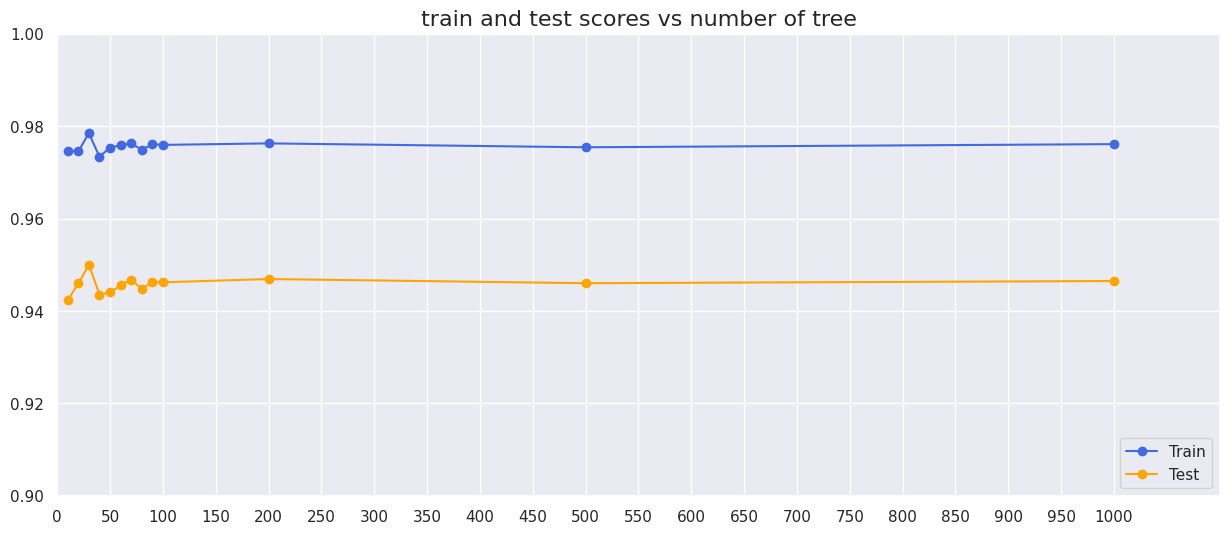

In [175]:
# plot of train and test scores vs tree depth
plt.figure(figsize=(15, 6))
plt.plot(n_estimators, train_scores, '-o', label='Train', c='royalblue')
plt.plot(n_estimators, test_scores, '-o', label='Test', c='orange')

plt.title('train and test scores vs number of tree', fontsize=16)
plt.xticks(np.arange(0, 1050, 50))
plt.xlim([0, max(n_estimators)+100])
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

plt.show()

เราสามารถเห็นได้ว่า accuracy (r squared) ของโมเดลในชุดข้อมูลการ test set และ train set ไม่มีการเปลี่ยนแปลงมากเท่าไหร่ ซึ่งแสดงว่าทุกๆ จำนวนของต้นไม้ (n_estimators) ทำให้โมเดลมีแนวโน้มที่จะ overfit


In [176]:
first_result.loc[first_result['regressor_name'] == 'Random Forest Regression']

,regressor_name,RMSE,R2_Score
0,Random Forest Regression,124619.892918,0.951793


ถึงแม้ว่า Random Forest Regression จะเป็นโมเดลที่ดีที่สุดและมีประสิทธิภาพดีที่สุดในการทำนายผลยอดขาย แต่เหมือนว่าโมเดลนี้จะไม่ตอบโจทย์ปัญหาหรือข้อมูลชุดนี้สักเท่าไหร่

**พล็อตกราฟ actual vs predict values ของ Random Forest Regression**

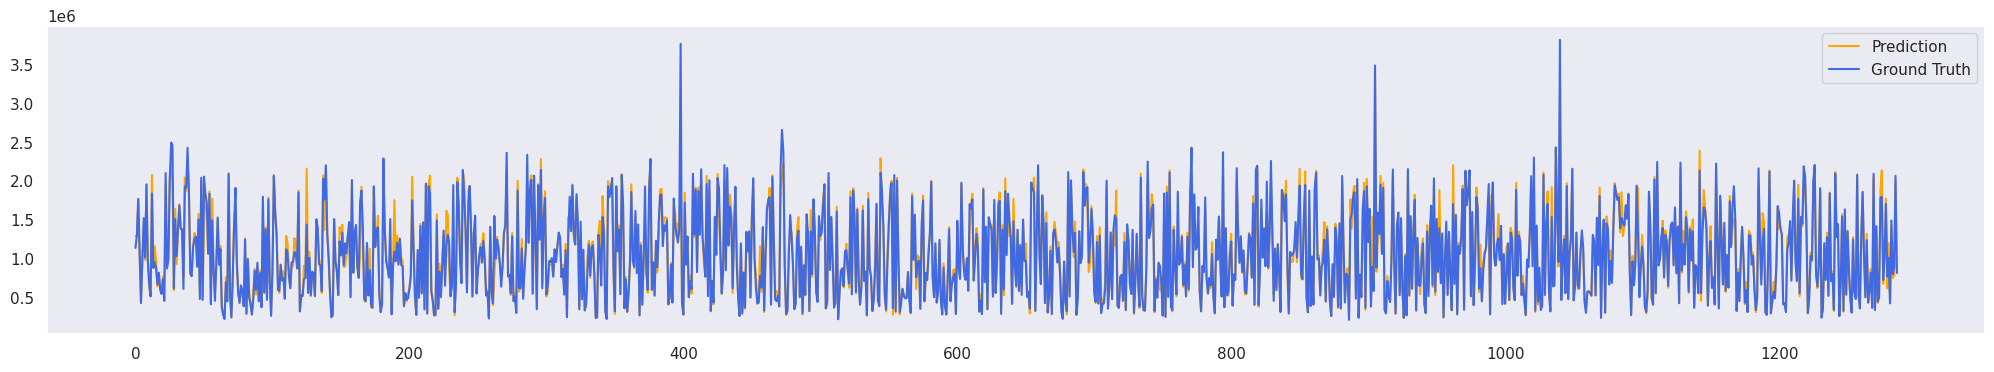

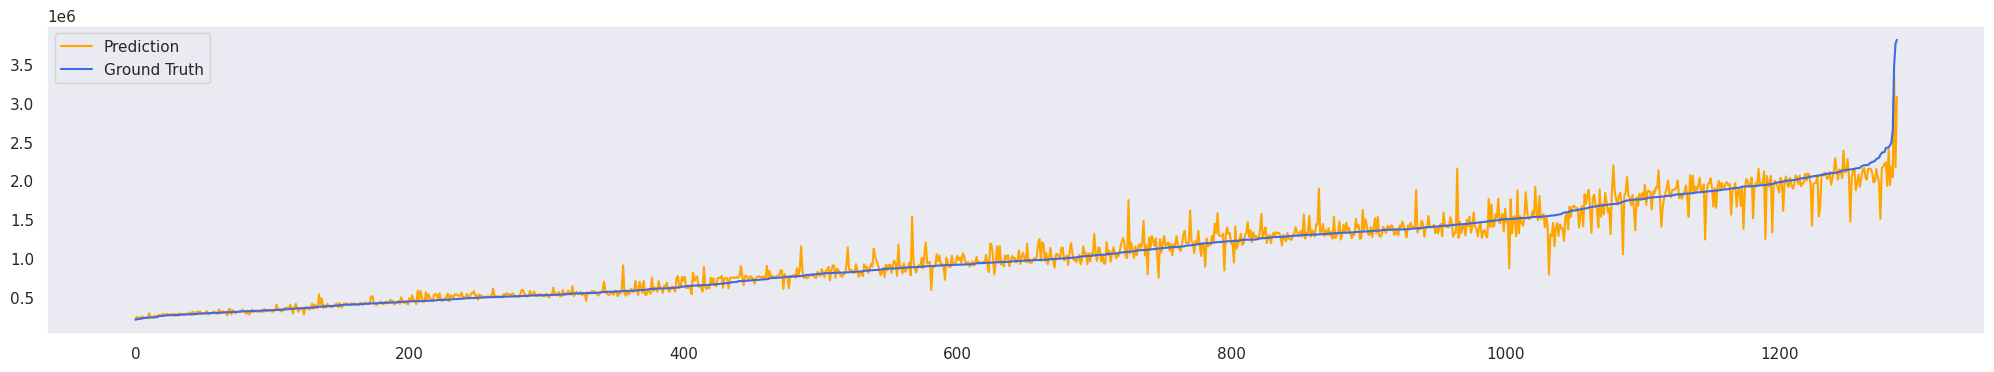

In [177]:
plot_ypred_vs_ytest(random_forest_regressor)

**พล็อต Scatter plot พร้อมเส้น Regression line ของโมเดลและ dataset นี้**

<Axes: xlabel='Weekly_Sales'>

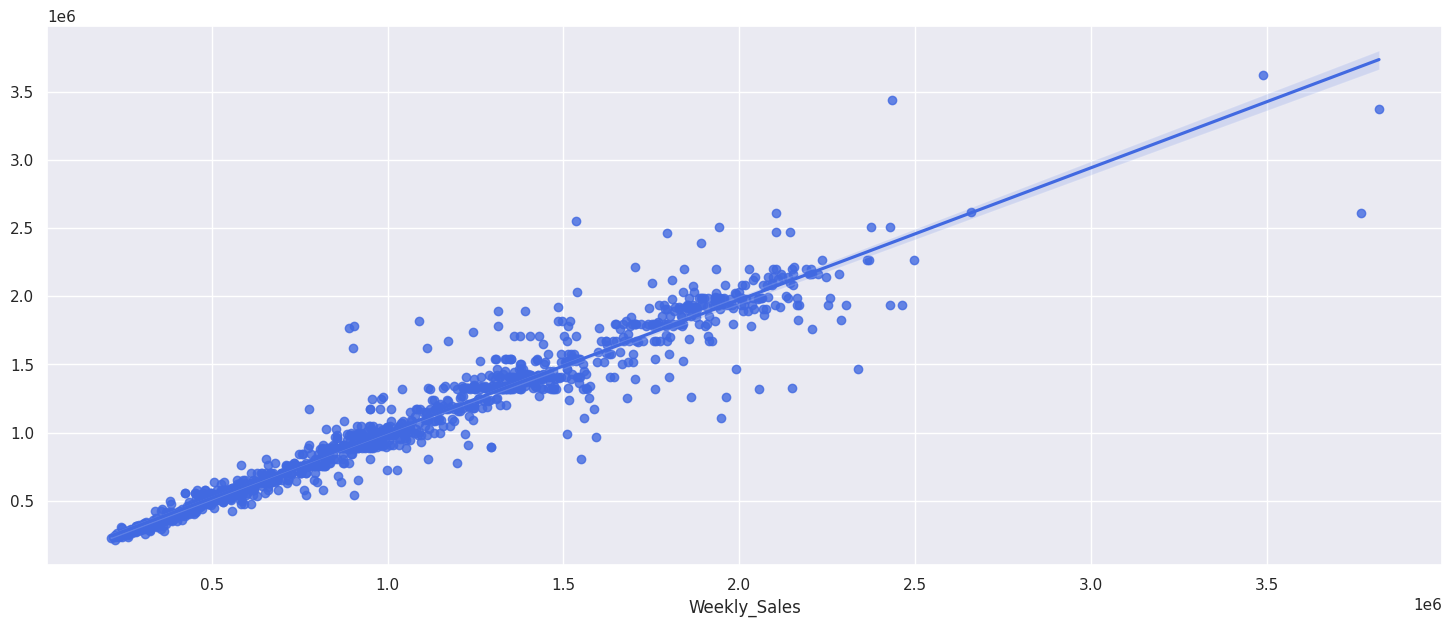

In [178]:
plt.figure(figsize=(18, 7))
sns.regplot(x=y_test, y=y_pred, ci=95, color='royalblue')

**การตรวจสอบความสำคัญของแต่ละตัวแปร(feature) ใน Random Forest Regressor**

In [179]:
pd.DataFrame({'Variable':X.columns,
              'Importance':random_forest_regressor.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,Store,0.690350
4,CPI,0.153333
5,Employment,0.098952
8,Day,0.017959
7,Month,0.017152
2,Temperature,0.010411
3,Fuel_Price,0.008975
1,Holiday_Flag,0.002237
6,Year,0.000631


**คำนวณค่า Percentage Error จากค่า RMSE**

Percentage Error = (RMSE / Median of target variable) * 100

In [180]:
random_forest_regressor

RandomForestRegressor(max_depth=10)

In [181]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [182]:
med = y.median()
y_pred = random_forest_regressor.predict(X_test)
r2 = round(r2_score(y_test, y_pred), 2)
percentage_error = float(round((rmse/med) * 100, 2))
depth = 10

In [183]:
print(f'\033[1m สรุปได้ว่า โมเดล Random Forest Regressor ที่ดีที่สุดสำหรับข้อมูลชุดนี้ มีจำนวนต้นไม้ 100 ต้น, มีความลึกของต้น {depth} ความลึก \n  มี R2 Score {r2} และมี percentage error เท่ากับ {percentage_error}% (RMSE of {rmse.astype(float).round(2)})')

 สรุปได้ว่า โมเดล Random Forest Regressor ที่ดีที่สุดสำหรับข้อมูลชุดนี้ มีจำนวนต้นไม้ 100 ต้น, มีความลึกของต้น 10 ความลึก 
  มี R2 Score 0.94 และมี percentage error เท่ากับ 15.01% (RMSE of 144214.53)


## Conclusion

**จากการทำ Hyperparameter tuning, Visualizing และประเมินผลออกมาใหม่ ทำให้เรารู้ว่าโมเดล Multiple Linear Regression, Ridge Regression และ Lasso Regression มีประสิทธิภาพที่ยังคงย่ำแย่มากเช่นเดิม แต่ในขณะเดียวกัน Decision Tree Regression และ Random Forest Regression ยังคงมีประสิทธิภาพที่ดี แต่จากการตรวจสอบความ overfitting ของโมเดล ทำให้เรารู้ว่า ถึง Random Forest Regression นั้นจะมีประสิทธิภาพที่ดีที่สุดในบรรดาโมเดลที่เราเลือกมาทดลอง แต่ Random Forest Regression ก็ overfit กับชุดข้อมูลนี้ และทำให้โมเดลเพียงหนึ่งเดียวที่เราจะเลือกมาใช้งานจริงได้จากบรรดาโมเดลที่เราเลือกทดลอง มีเพียง Decision Tree Regression เท่านั้น**

**และเรายังรู้ว่า Fold ที่ 5 จะให้ประสิทธิภาพที่ดีที่สุดจาก Fold ทุก Fold จากการเปรียบเทียบ Fold ทั้งหมดจากการทำ 5 Fold Cross-Validation โดยใช้ฟังก์ชัน cross_val_score และทำการพล็อตกราฟแท่งเปรียบเทียบของแต่ละ Regressor ออกมา โดยเปรียบเทียบทั้งค่า RMSE และ R squared**

---------